In [119]:
!pip install statsmodels
!pip install pmdarima
!pip install catboost
!pip install prophet

In [118]:
import aiohttp
import inspect
import re
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from functools import wraps
from datetime import datetime, timedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.filters.hp_filter import hpfilter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# SARIMAX time series model for stock prices of different companies

This function uses the Yahoo Finance library to download historical stock price data for various companies

In [3]:
def get_data(symbol, start_date='2023-01-01', end_date='2023-12-31', interval='60m'):
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return stock_data

List of companies to analyze

In [4]:
relevant_companies = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'JPM', 'V', 'NVDA']

In [5]:
dataframes = {}

for company in relevant_companies:
    try:
        intraday_data = get_data(symbol=company, interval='60m')
        dataframes[company] = intraday_data
    except ValueError as e:
        print(f"Error retrieving intraday data for {company}: {e}")

for company, df in dataframes.items():
    print(f"\nIntraday data for {company}:\n")
    print(df.head())



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Intraday data for AAPL:

                           Open        High         Low       Close  \
Datetime                                                              
2023-01-03 09:30:00  130.279999  130.899994  125.230003  125.459999   
2023-01-03 10:30:00  125.459999  125.870003  124.730003  125.345001   
2023-01-03 11:30:00  125.350197  125.370003  124.349098  124.660004   
2023-01-03 12:30:00  124.660004  124.940002  124.190002  124.649902

Time series plot

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


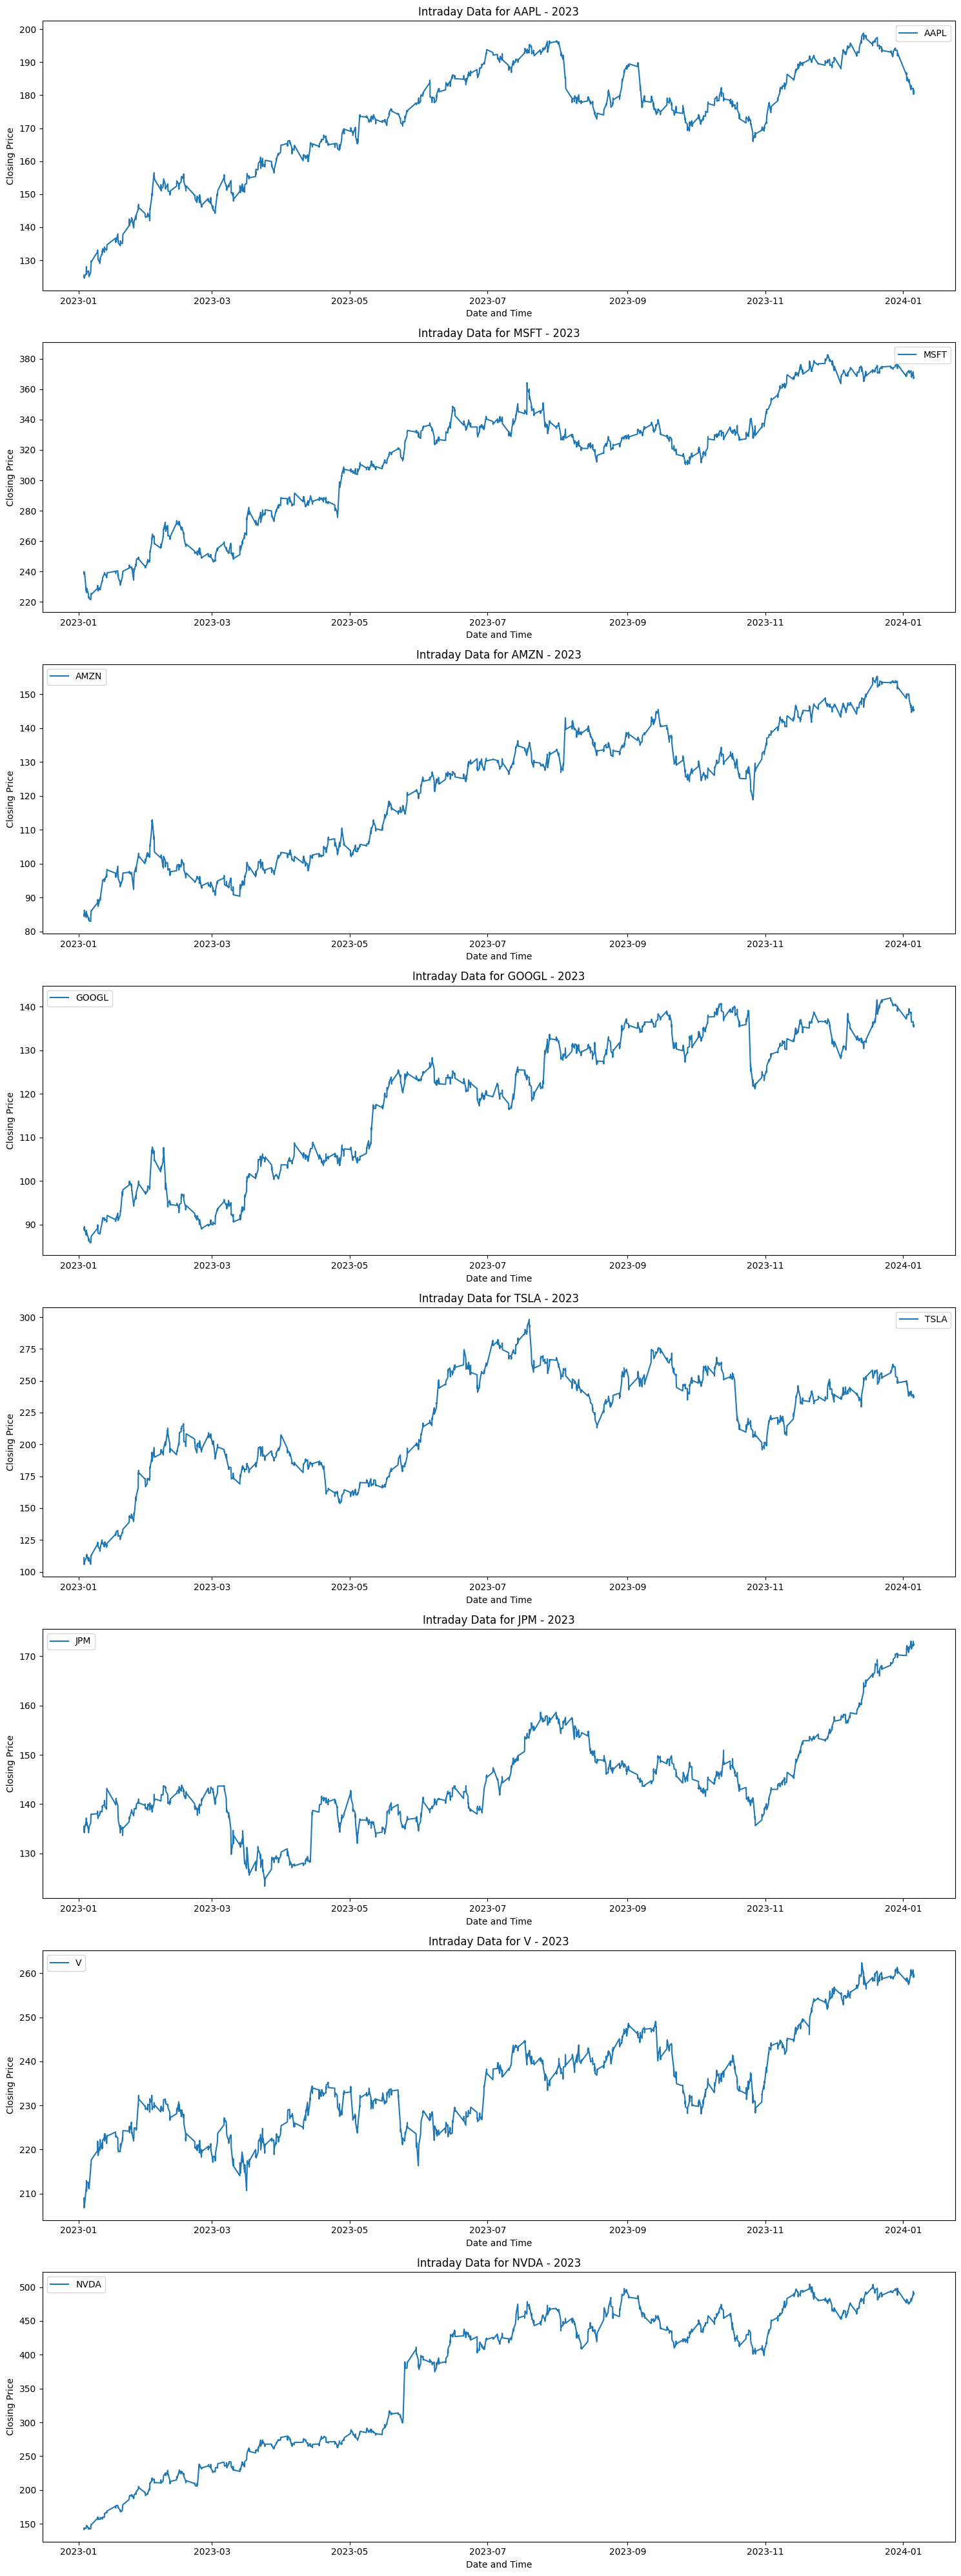

In [6]:
# Get the current date and the start date for the entire year 2023
start_date = datetime(2023, 1, 1)
end_date = datetime.now()

companies = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'JPM', 'V', 'NVDA']
dataframes = {}

for company in companies:
    try:
        intraday_data = yf.download(company, start=start_date, end=end_date, interval='60m')
        dataframes[company] = intraday_data
    except ValueError as e:
        print(f"Error retrieving intraday data for {company}: {e}")

fig, axes = plt.subplots(nrows=len(companies), ncols=1, figsize=(15, 5 * len(companies)))

for i, (company, df) in enumerate(dataframes.items()):
    axes[i].plot(df.index, df['Close'], label=company)
    axes[i].set_title(f"Intraday Data for {company} - 2023")
    axes[i].set_xlabel("Date and Time")
    axes[i].set_ylabel("Closing Price")
    axes[i].legend()

plt.tight_layout()
plt.show()


ETS analysis of a time series


• The trend component captures the overall trend of the time series.


• The seasonality component captures cyclical/seasonal changes.


• The error component captures noise in the data that could not be captured with the other two components.

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


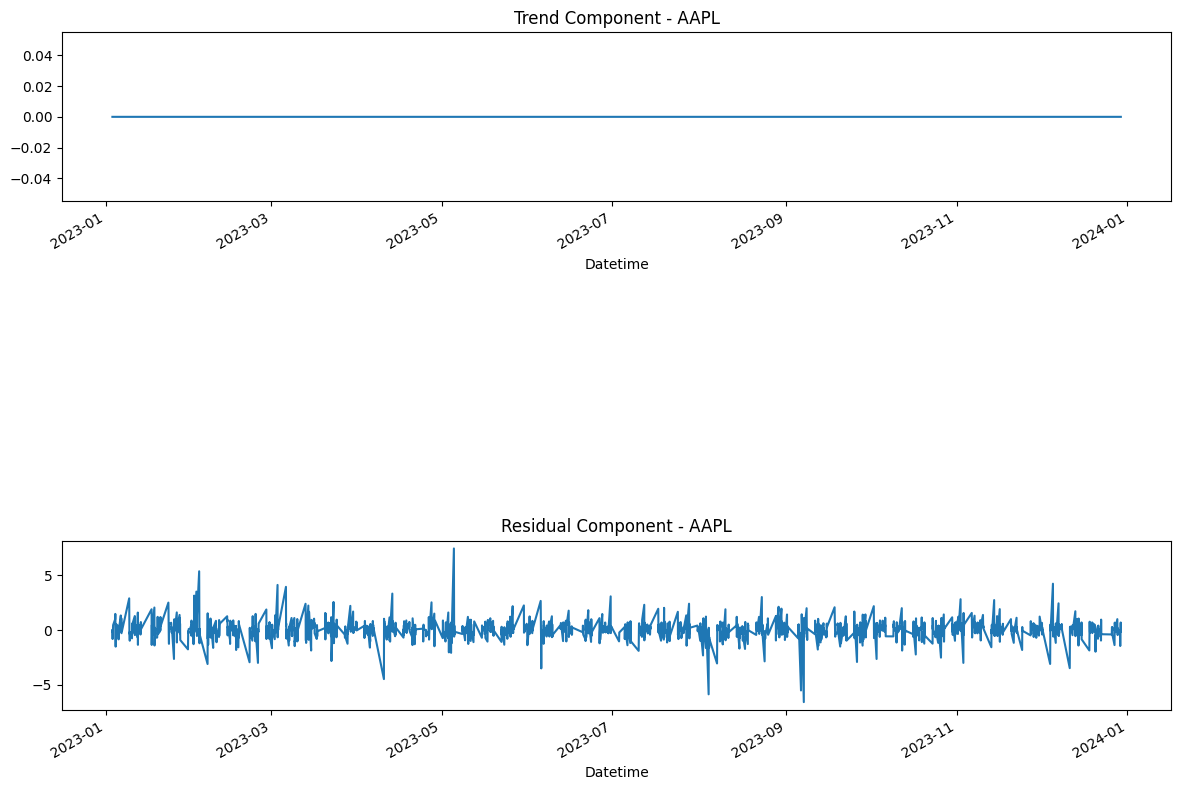

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


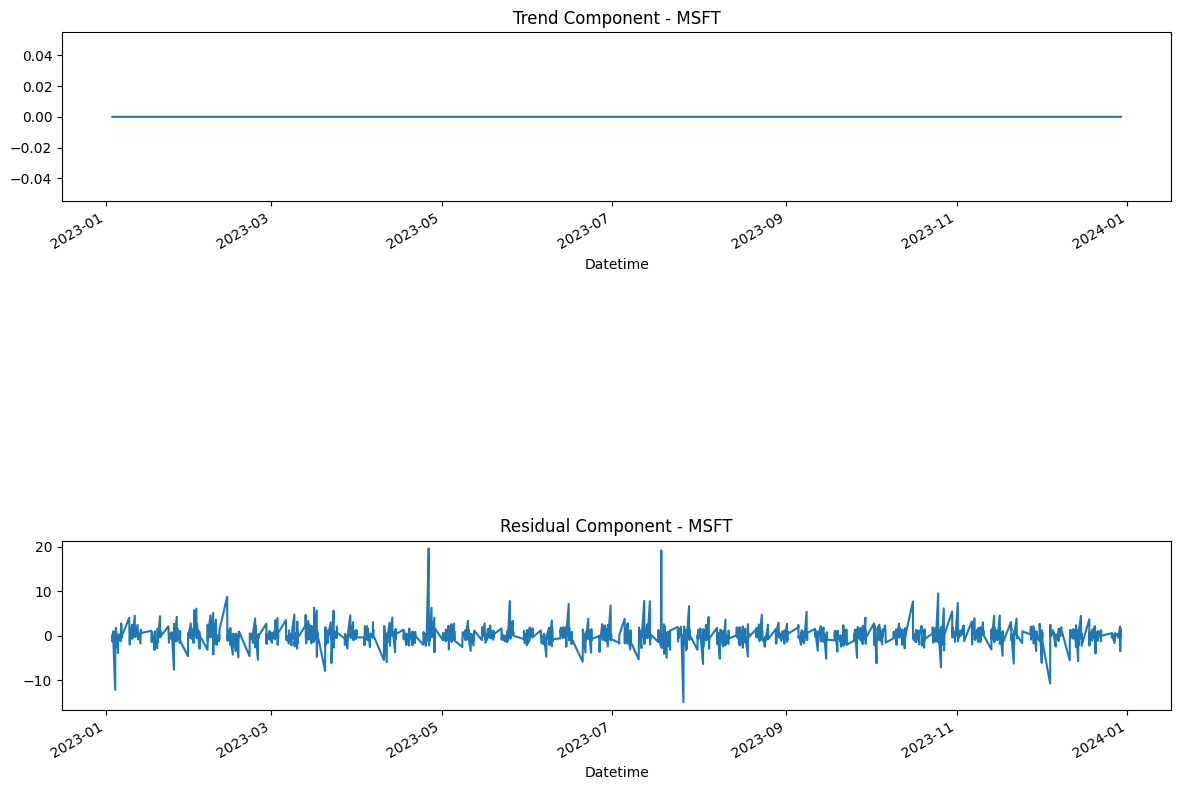

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


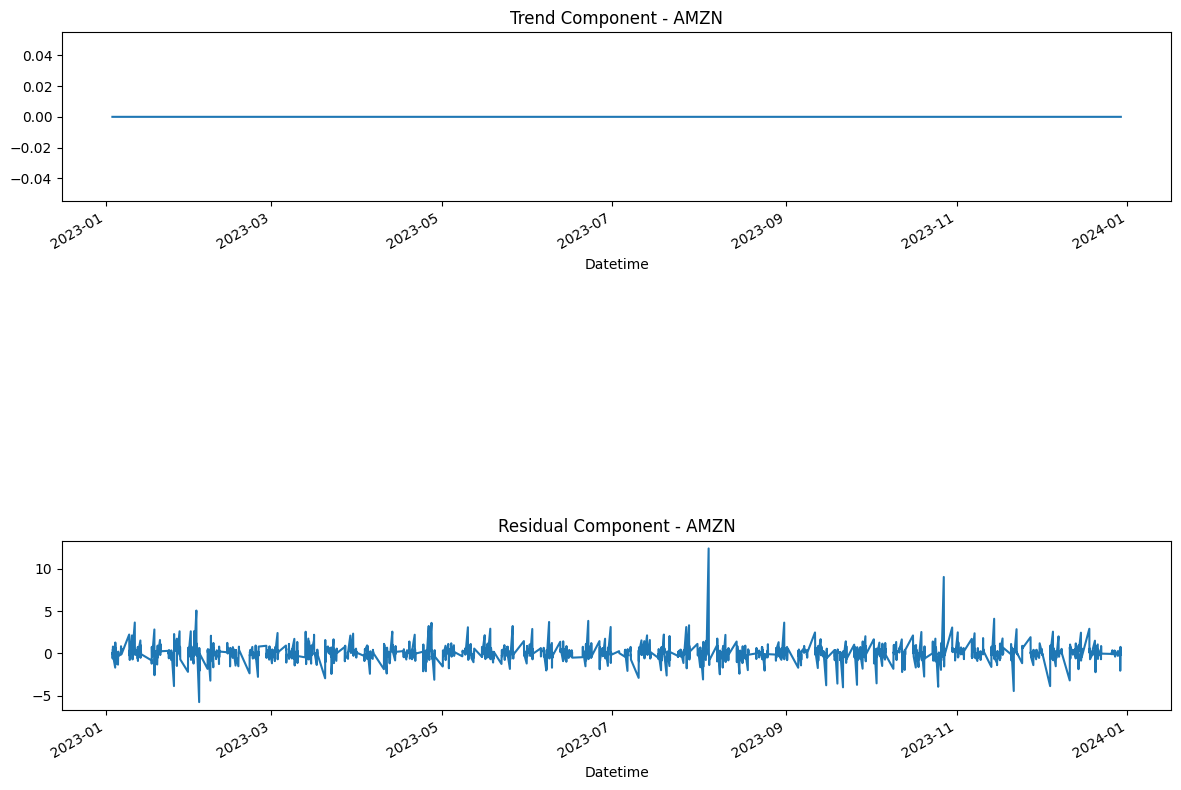

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


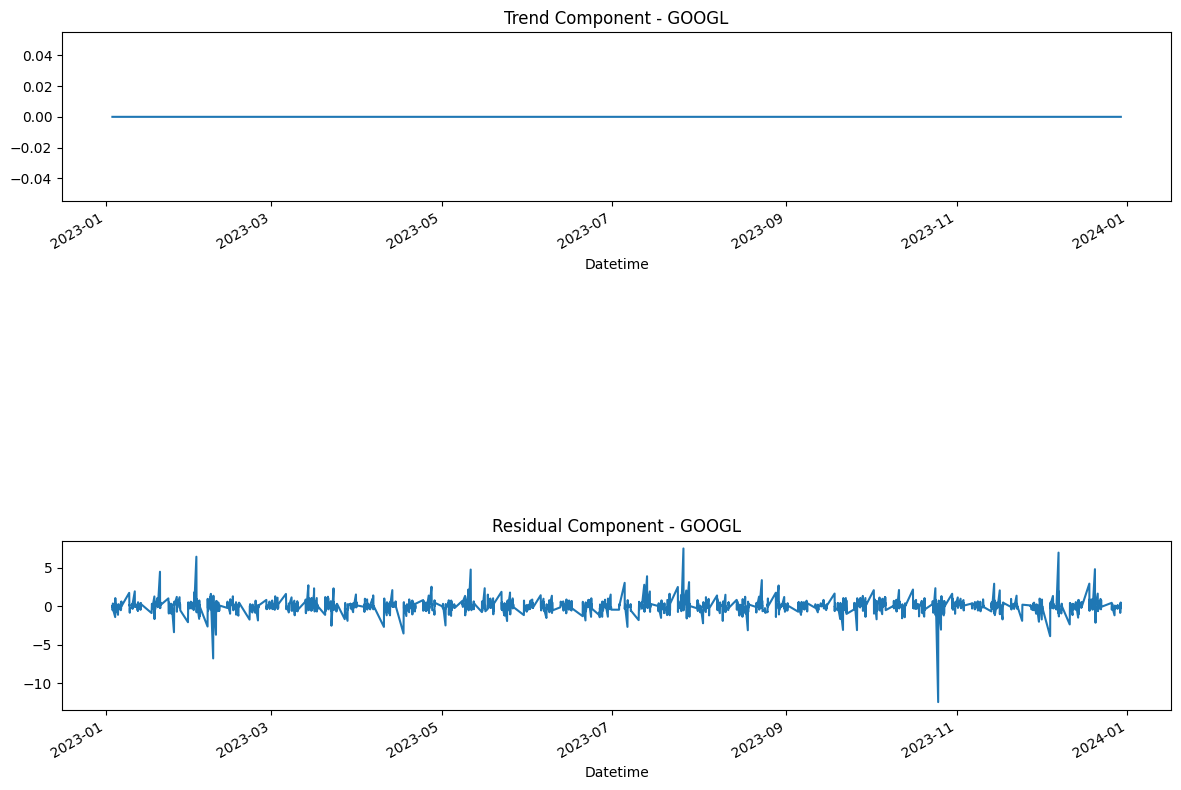

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


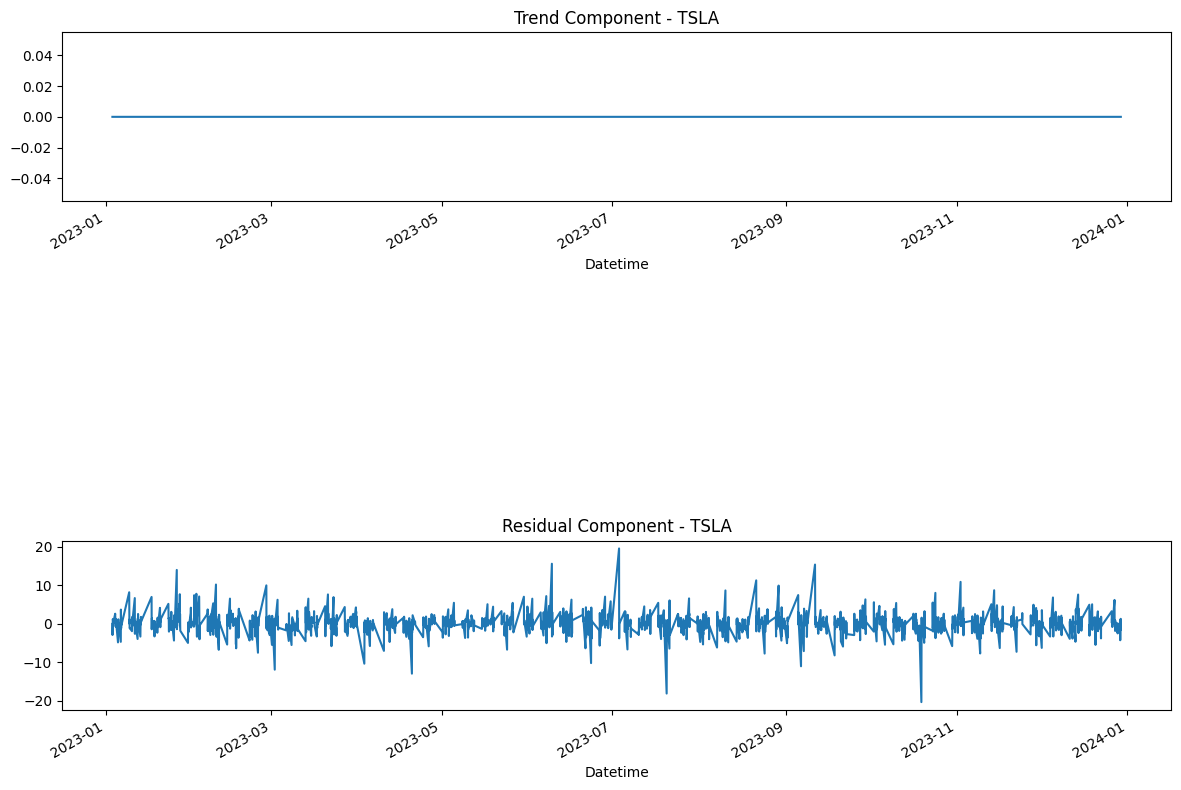

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


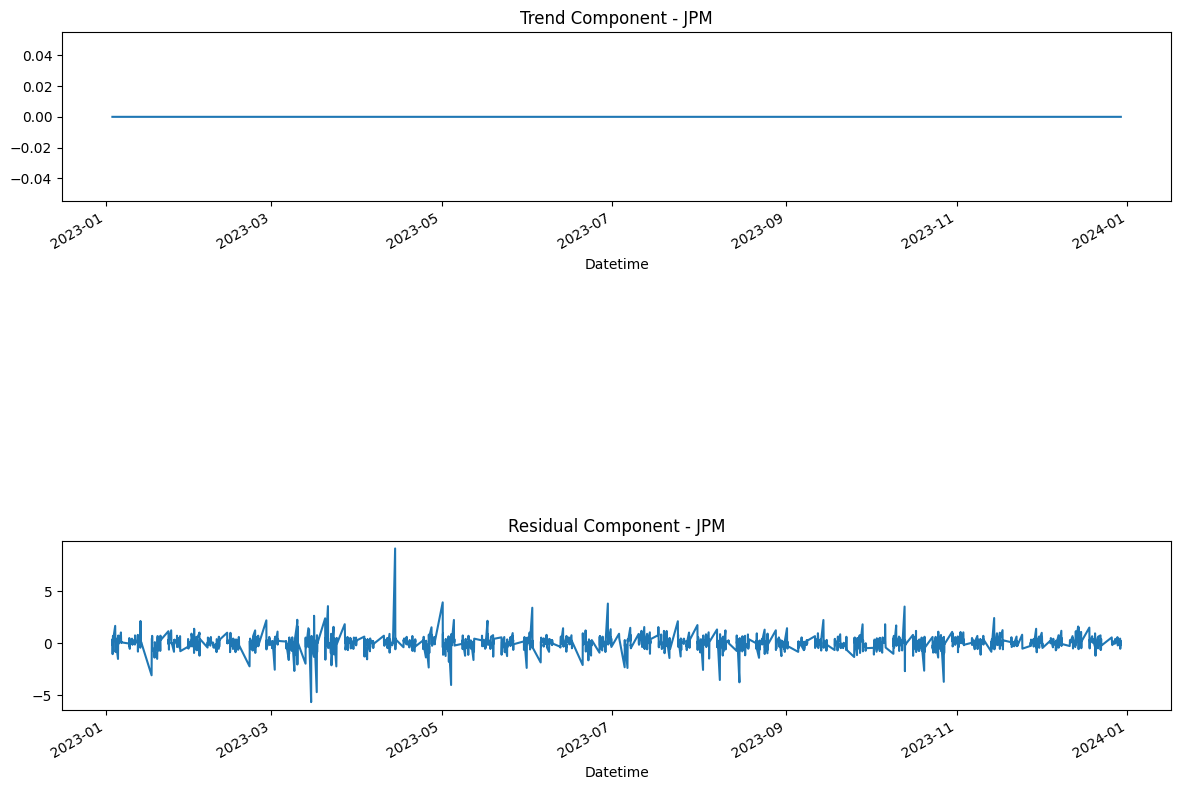

[*********************100%%**********************]  1 of 1 completed
No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


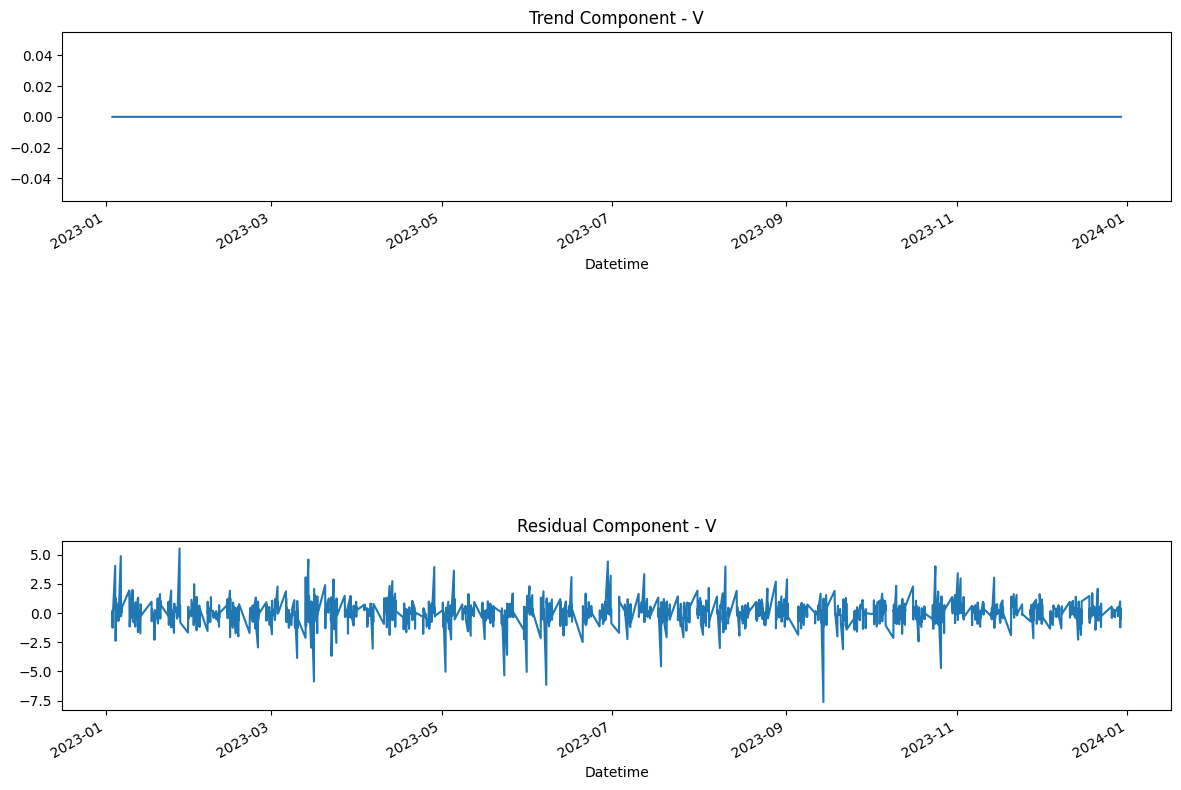

[*********************100%%**********************]  1 of 1 completed
No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


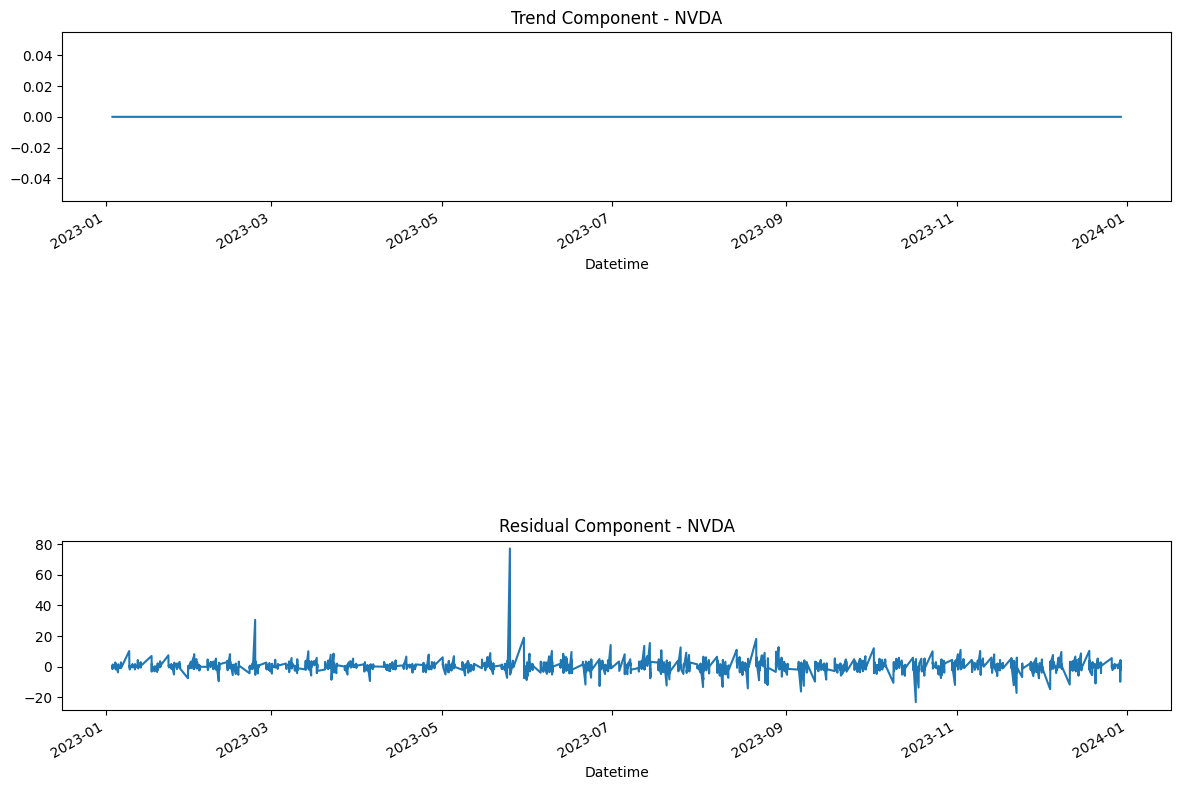

In [7]:
def get_yahoo_data(symbol, start_date='2023-01-01', end_date='2023-12-31', interval='60m'):
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return stock_data

def ets_analysis(time_series, company_name):
    ets_model = ExponentialSmoothing(time_series, seasonal='add', seasonal_periods=24)
    ets_result = ets_model.fit()

    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    ets_result.trend.plot(title=f'Trend Component - {company_name}')

    try:
        seasonal_component = ets_result.seasonal
        plt.subplot(3, 1, 2)
        seasonal_component.plot(title=f'Seasonal Component - {company_name}')
    except AttributeError as e:
        print(f"No seasonal component available: {e}")

    plt.subplot(3, 1, 3)
    ets_result.resid.plot(title=f'Residual Component - {company_name}')

    plt.tight_layout()
    plt.show()

for company in companies:
    try:
        intraday_data = get_yahoo_data(symbol=company, interval='60m')
        time_series = intraday_data['Close']
        ets_analysis(time_series, company)

    except ValueError as e:
        print(f"Error retrieving intraday data for {company}: {e}")


The Hodrick-Prescott filter. The Hodrick-Prescott (HP) filter is used to separate the trend and cyclical components
from time series data by removing short-term fluctuations from the longer-term trend.

[*********************100%%**********************]  1 of 1 completed


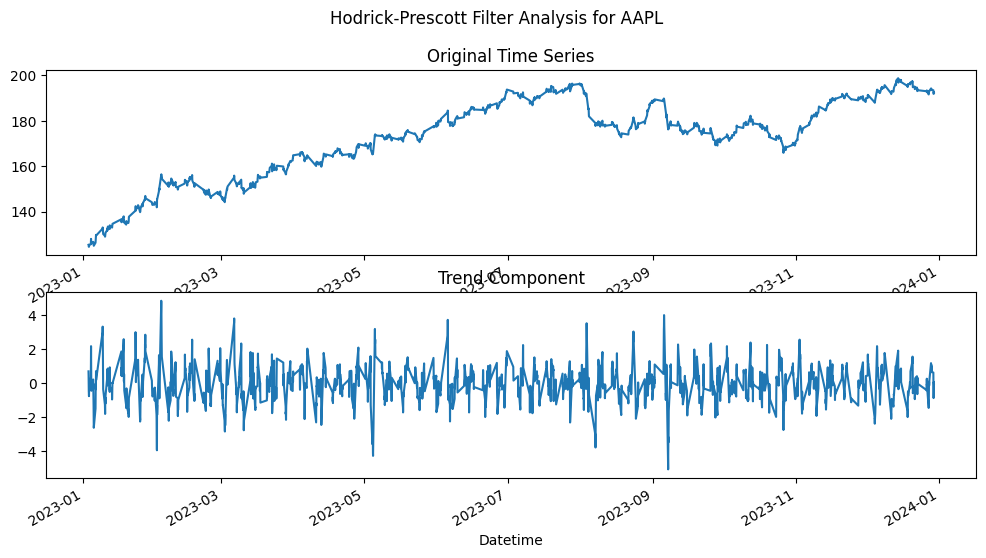

[*********************100%%**********************]  1 of 1 completed


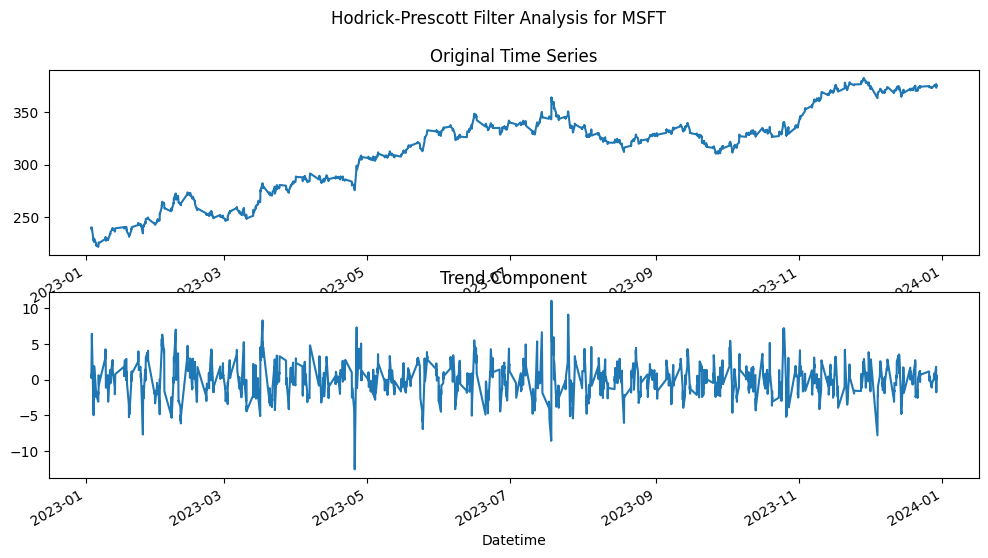

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


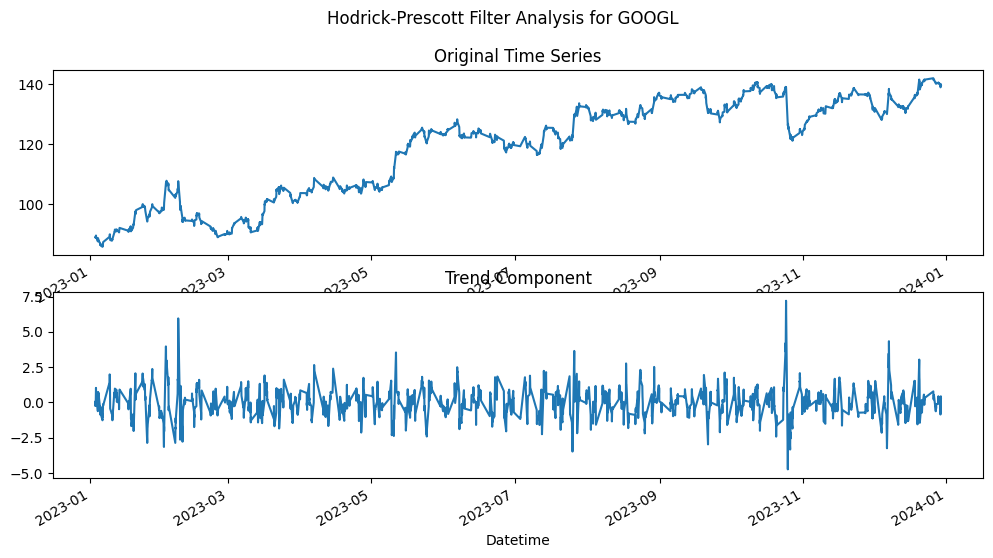

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


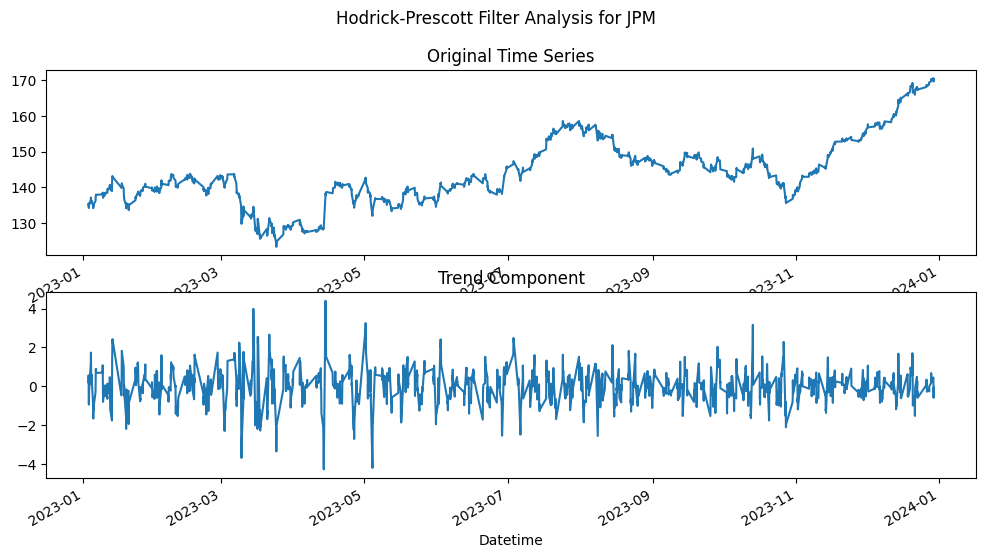

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


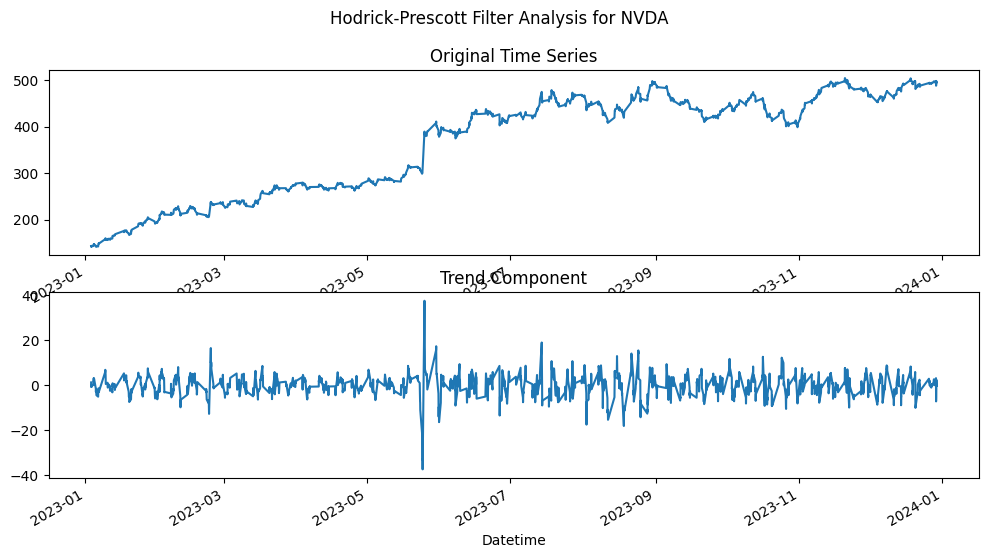

In [8]:
def hp_filter_analysis(time_series, company_name):
    trend, cycle = hpfilter(time_series, lamb=1600)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    time_series.plot(title='Original Time Series')

    plt.subplot(2, 1, 2)
    trend.plot(title='Trend Component')
    plt.suptitle(f'Hodrick-Prescott Filter Analysis for {company_name}')
    plt.show()

    return trend, cycle

for company in companies:
    try:
        intraday_data = get_yahoo_data(symbol=company, interval='60m')
        time_series = intraday_data['Close']
        trend_component, cycle_component = hp_filter_analysis(time_series, company)

    except ValueError as e:
        print(f"Error retrieving intraday data for {company}: {e}")

Dickey-Fuller test.
Stationary time series are time series whose statistical properties such as mean, variance, and autocorrelation are constant over time.

In [9]:
def get_yahoo_data(symbol, start_date='2023-01-01', end_date='2023-12-31', interval='60m'):
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return stock_data

def dickey_fuller_test(time_series, company_name):
    result = adfuller(time_series, autolag='AIC')

    print(f"Results of Dickey-Fuller Test for {company_name}:")
    print(f'Test Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

    if result[1] <= 0.05:
        print("Conclusion: La serie temporal es estacionaria (rechazamos la hipótesis nula)")
    else:
        print("Conclusion: La serie temporal no es estacionaria (no rechazamos la hipótesis nula)")

for company in companies:
    try:
        intraday_data = get_yahoo_data(symbol=company, interval='60m')
        close_column = 'Close'
        dickey_fuller_test(intraday_data[close_column], company)

    except ValueError as e:
        print(f"Error retrieving intraday data for {company}: {e}")

[*********************100%%**********************]  1 of 1 completed
Results of Dickey-Fuller Test for AAPL:
Test Statistic: -2.4963078385717608
p-value: 0.11637525401340776
Critical Values: {'1%': -3.4341116127463858, '5%': -2.863201542300677, '10%': -2.567654556829725}
Conclusion: La serie temporal no es estacionaria (no rechazamos la hipótesis nula)
[*********************100%%**********************]  1 of 1 completed
Results of Dickey-Fuller Test for MSFT:
Test Statistic: -1.1961653149884706
p-value: 0.6752431173691037
Critical Values: {'1%': -3.4341116127463858, '5%': -2.863201542300677, '10%': -2.567654556829725}
Conclusion: La serie temporal no es estacionaria (no rechazamos la hipótesis nula)
[*********************100%%**********************]  1 of 1 completed
Results of Dickey-Fuller Test for AMZN:
Test Statistic: -1.3046989263598874
p-value: 0.6270198165264937
Critical Values: {'1%': -3.4341116127463858, '5%': -2.863201542300677, '10%': -2.567654556829725}
Conclusion: La serie

Autocorrelation and partial autocorrelation of a
time series

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


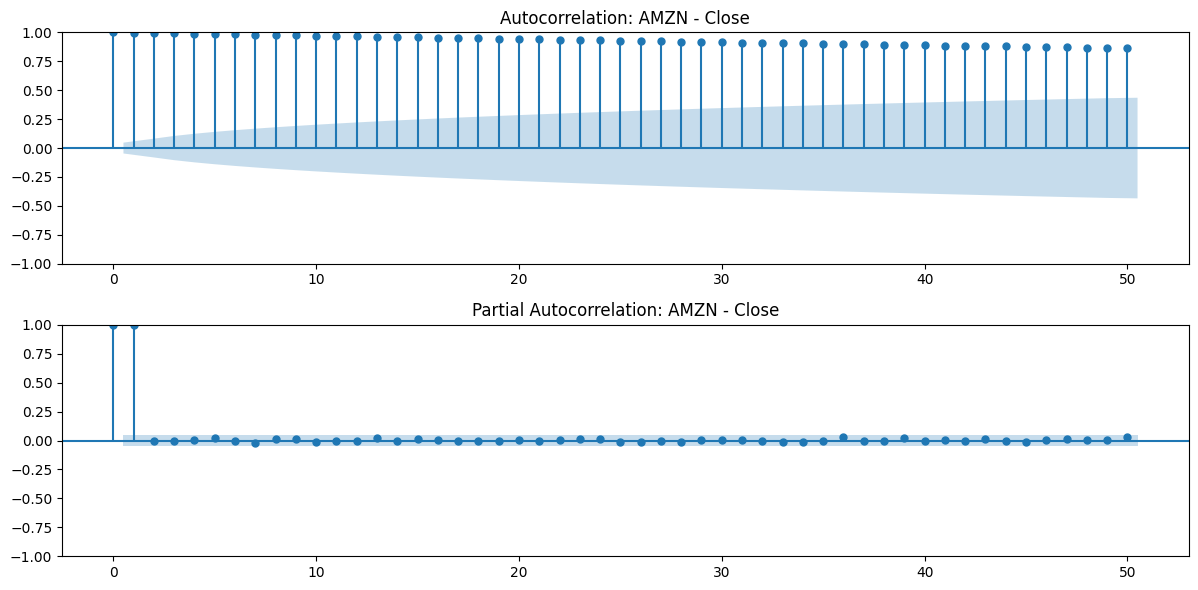

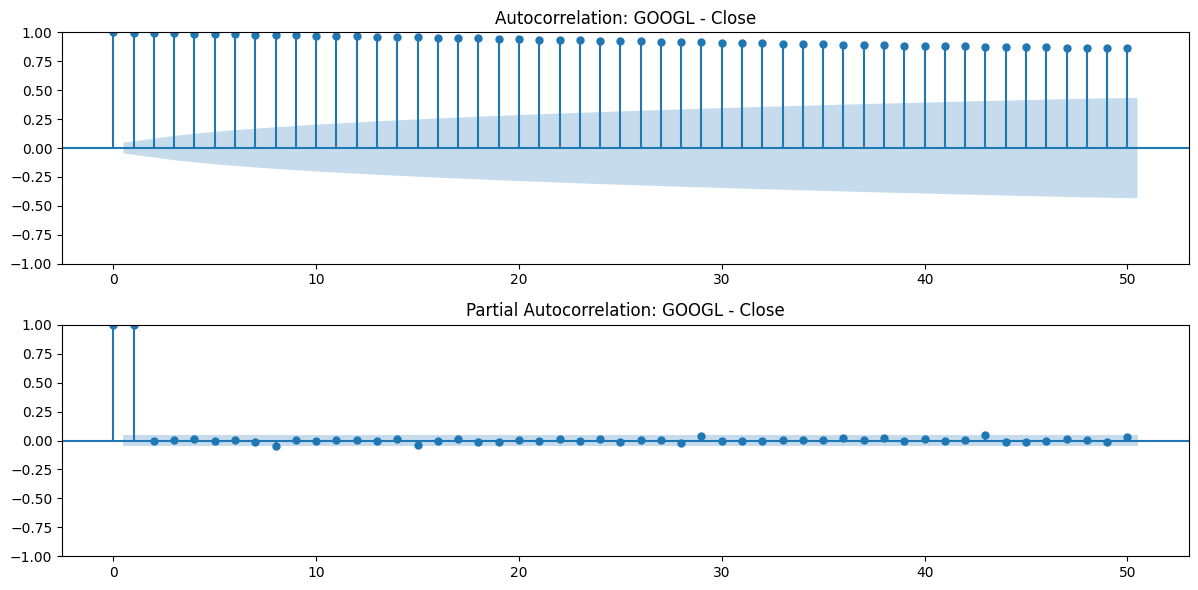

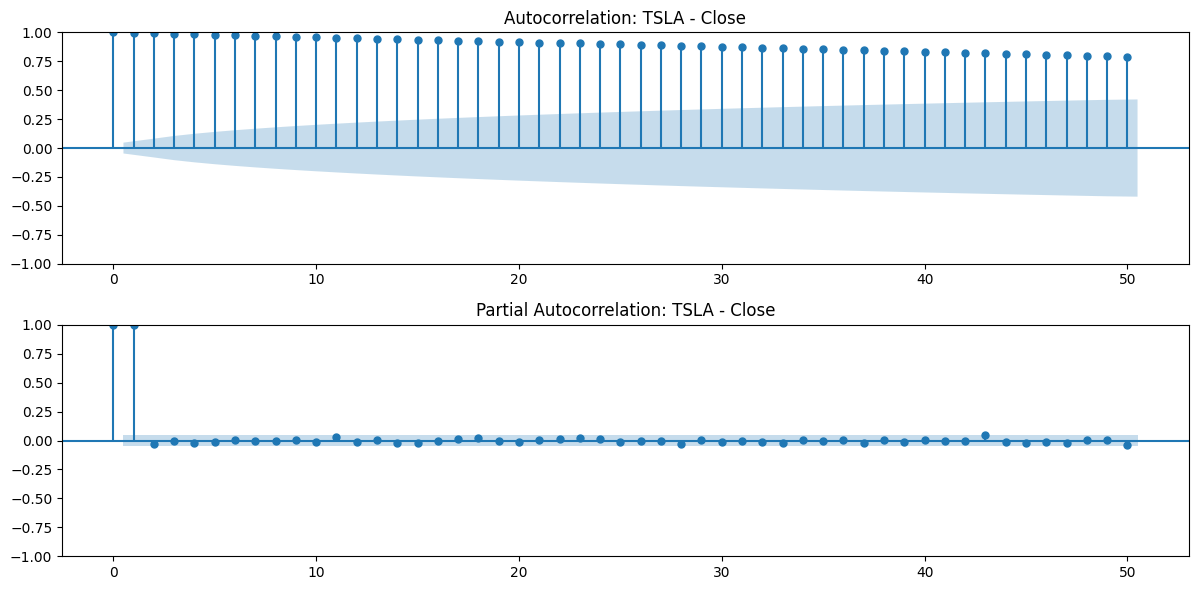

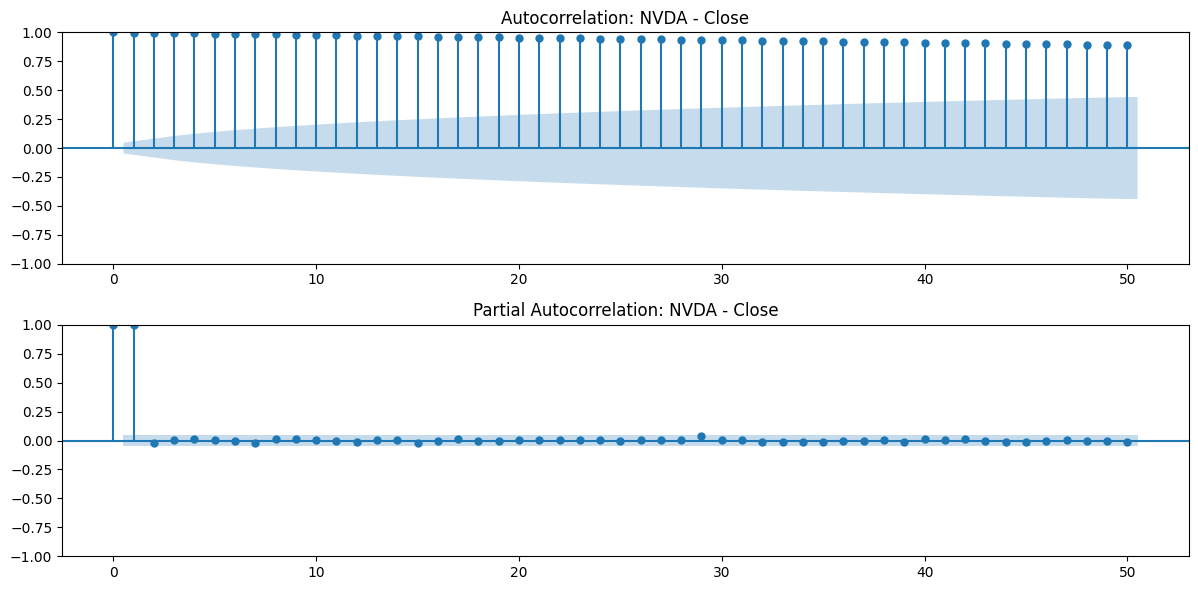

In [10]:
for company in companies:
    try:
        data_company = yf.download(company, start='2023-01-01', end='2023-12-31', interval='60m')
        dataframes[company] = data_company

    except ValueError as e:
        print(f"Error obtaining intraday data for {company}: {e}")

def plot_acf_pacf(time_series, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(time_series, lags=50, ax=plt.gca())
    plt.title(f'Autocorrelation: {title}')

    plt.subplot(2, 1, 2)
    plot_pacf(time_series, lags=50, ax=plt.gca())
    plt.title(f'Partial Autocorrelation: {title}')

    plt.tight_layout()
    plt.show()

for company, data_company in dataframes.items():
    try:
        time_series = data_company['Close']
        plot_acf_pacf(time_series, f'{company} - Close')

    except ValueError as e:
        print(f"Error processing data for {company}: {e}")

SARIMAX time series model

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

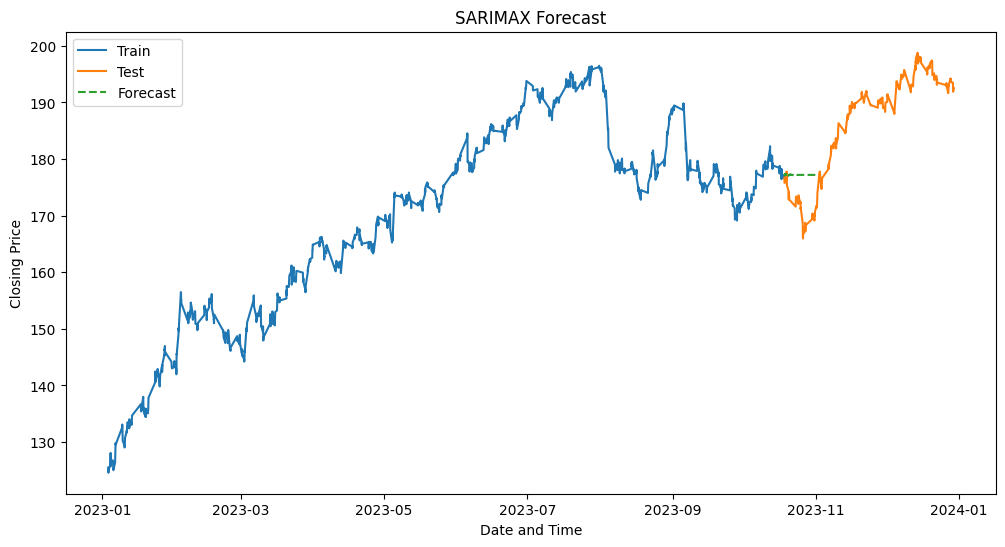

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


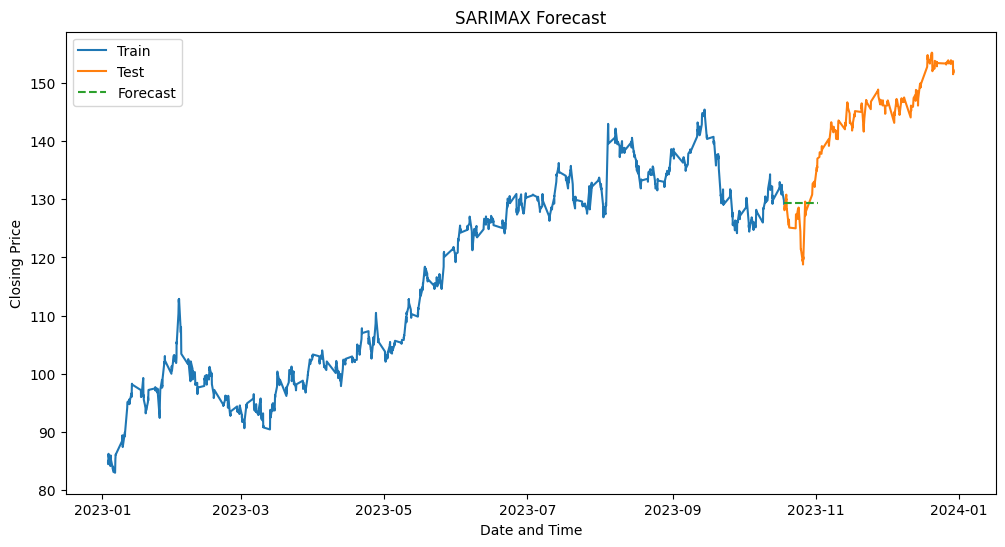

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


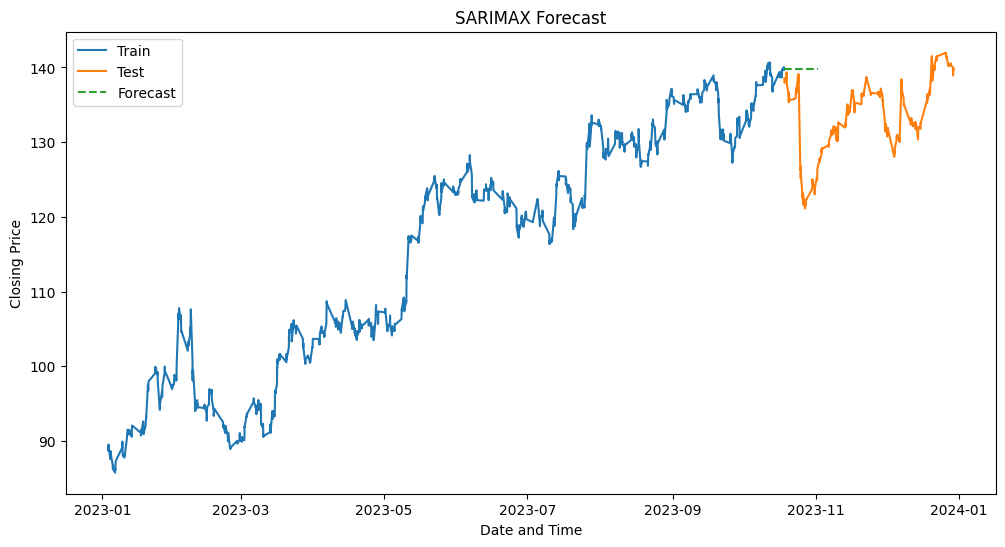

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


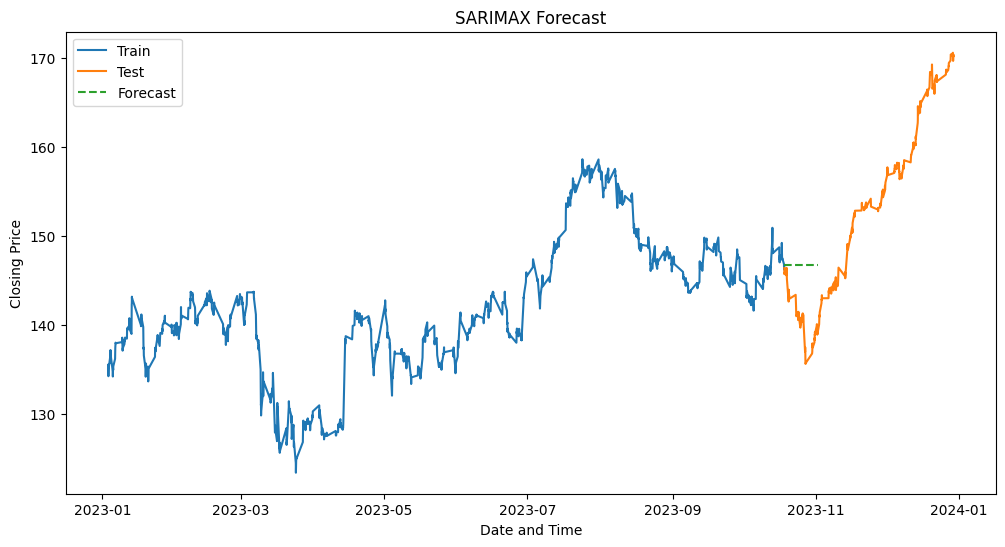

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


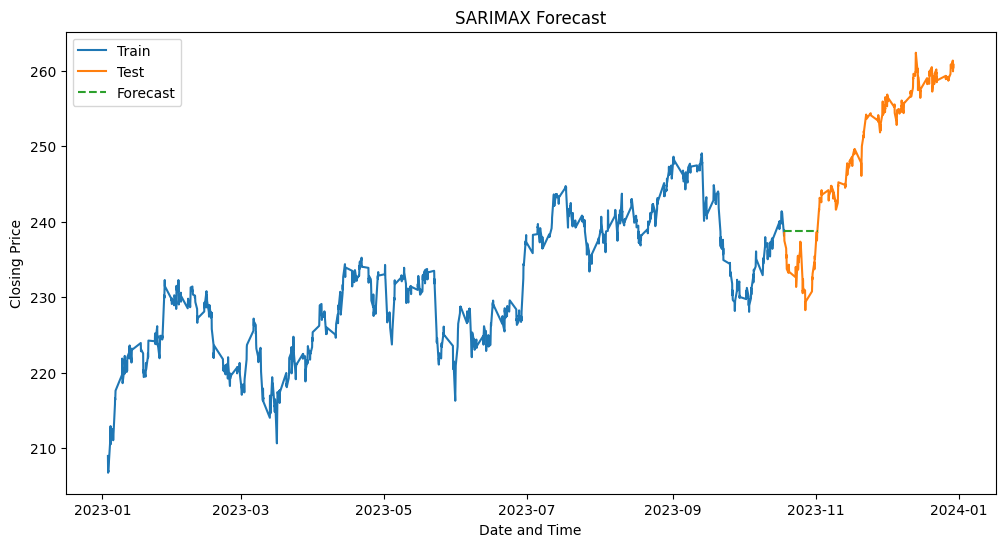

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


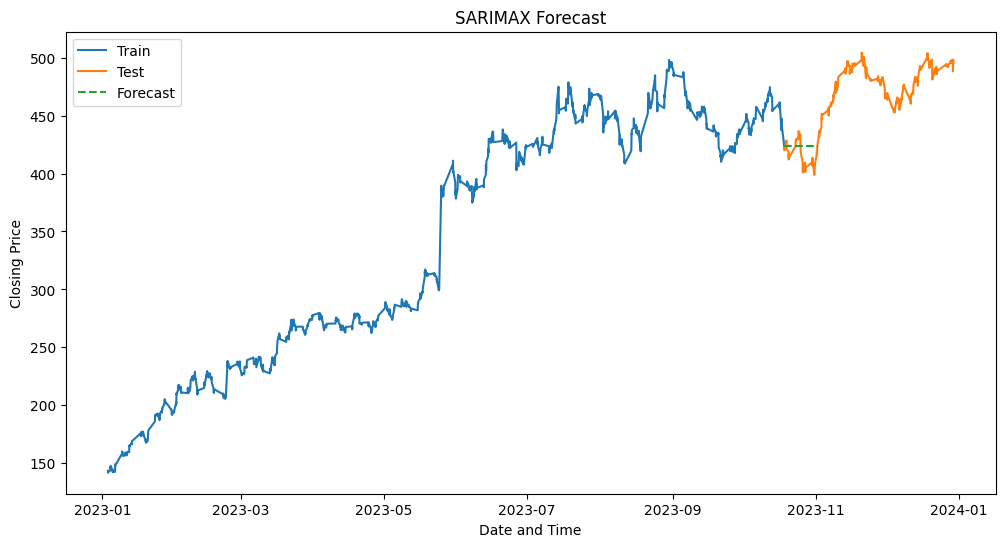

In [11]:
for company in companies:
    try:
        data_company = yf.download(company, start='2023-01-01', end='2023-12-31', interval='60m')
        dataframes[company] = data_company

    except ValueError as e:
        print(f"Error obtaining intraday data for {company}: {e}")

def sarimax_predict(time_series):
    train_size = int(len(time_series) * 0.8)
    train, test = time_series[:train_size], time_series[train_size:]

    model = auto_arima(train, seasonal=True, m=24)

    sarimax_model = SARIMAX(train, order=model.order, seasonal_order=model.seasonal_order)
    sarimax_result = sarimax_model.fit(disp=False)

    forecast = sarimax_result.get_forecast(steps=len(test))
    forecast_index = pd.date_range(start=test.index[0], periods=len(test), freq='60T')
    forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast_series.index, forecast_series, label='Forecast', linestyle='dashed')
    plt.title('SARIMAX Forecast')
    plt.xlabel('Date and Time')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

for company, data_company in dataframes.items():
    try:
        time_series = data_company['Close']
        sarimax_predict(time_series)

    except ValueError as e:
        print(f"Error processing data for {company}: {e}")

# CatBoost machine learning model to predict commodity prices

 List of commodities to analyze

In [12]:
def get_commodity_data(symbol, start_date='2023-01-01', end_date='2023-12-31', interval='60m'):
    try:
        commodity_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
        return commodity_data
    except (ValueError, KeyError) as e:
        print(f"Error obtaining intraday data for {symbol}: {e}")
        return None

commodities = {'NG': 'Natural Gas', 'HG': 'Copper', 'CL': 'Crude Oil WTI'}
dataframes = {}

for commodity, meaning in commodities.items():
    data_commodity = get_commodity_data(symbol=commodity, interval='60m')
    if data_commodity is not None and not data_commodity.empty:
        dataframes[commodity] = data_commodity

for commodity, df in dataframes.items():
    print(f"\nIntraday data for {commodities[commodity]} ({commodity}):\n")
    display(df.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Intraday data for Natural Gas (NG):



Open   High     Low  Close  Adj Close  Volume
Datetime                                                           
2023-01-03 09:30:00  6.040  6.245  6.0100  6.095      6.095  195979
2023-01-03 10:30:00  6.090  6.110  6.0150  6.040      6.040  156264
2023-01-03 11:30:00  6.050  6.100  6.0457  6.070      6.070   78804
2023-01-03 12:30:00  6.075  6.080  6.0400  6.070      6.070  108540
2023-01-03 13:30:00  6.070  6.090  6.0300  6.040      6.040   61787


Intraday data for Copper (HG):



Open   High    Low   Close  Adj Close  Volume
Datetime                                                            
2023-11-13 09:30:00  15.000  15.11  15.00  15.050     15.050       0
2023-11-13 10:30:00  15.065  15.08  15.01  15.040     15.040  138758
2023-11-13 11:30:00  15.040  15.07  15.00  15.015     15.015  117181
2023-11-13 12:30:00  15.020  15.03  15.00  15.015     15.015   44472
2023-11-13 13:30:00  15.015  15.04  15.01  15.010     15.010   82159


Intraday data for Crude Oil WTI (CL):



Open       High        Low      Close  Adj Close  \
Datetime                                                                     
2023-01-03 09:30:00  78.790001  78.809998  78.190002  78.375000  78.375000   
2023-01-03 10:30:00  78.379997  78.480003  77.949997  78.070000  78.070000   
2023-01-03 11:30:00  78.050003  78.199997  77.769997  77.910004  77.910004   
2023-01-03 12:30:00  77.915001  78.279999  77.720001  78.250000  78.250000   
2023-01-03 13:30:00  78.239998  78.570000  78.239998  78.360001  78.360001   

                     Volume  
Datetime                     
2023-01-03 09:30:00  386127  
2023-01-03 10:30:00  242650  
2023-01-03 11:30:00  330194  
2023-01-03 12:30:00  250985  
2023-01-03 13:30:00  177125

Time series plot

In [13]:
start_date = datetime(2023, 1, 1)
end_date = datetime.now()

fig, axes = plt.subplots(nrows=len(commodities), ncols=1, figsize=(15, 5 * len(commodities)))

for i, (commodity, df) in enumerate(dataframes.items()):
    df_2023 = df[(df.index >= start_date) & (df.index <= end_date)]

    axes[i].plot(df_2023.index, df_2023['Close'], label=commodities[commodity])
    axes[i].set_title(f"Intraday Data for {commodities[commodity]} ({commodity}) - 2023")
    axes[i].set_xlabel("Date and Time")
    axes[i].set_ylabel("Closing Price")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

ETS analysis of a time series

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


[*********************100%%**********************]  1 of 1 completed
No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[*********************100%%**********************]  1 of 1 completed
No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


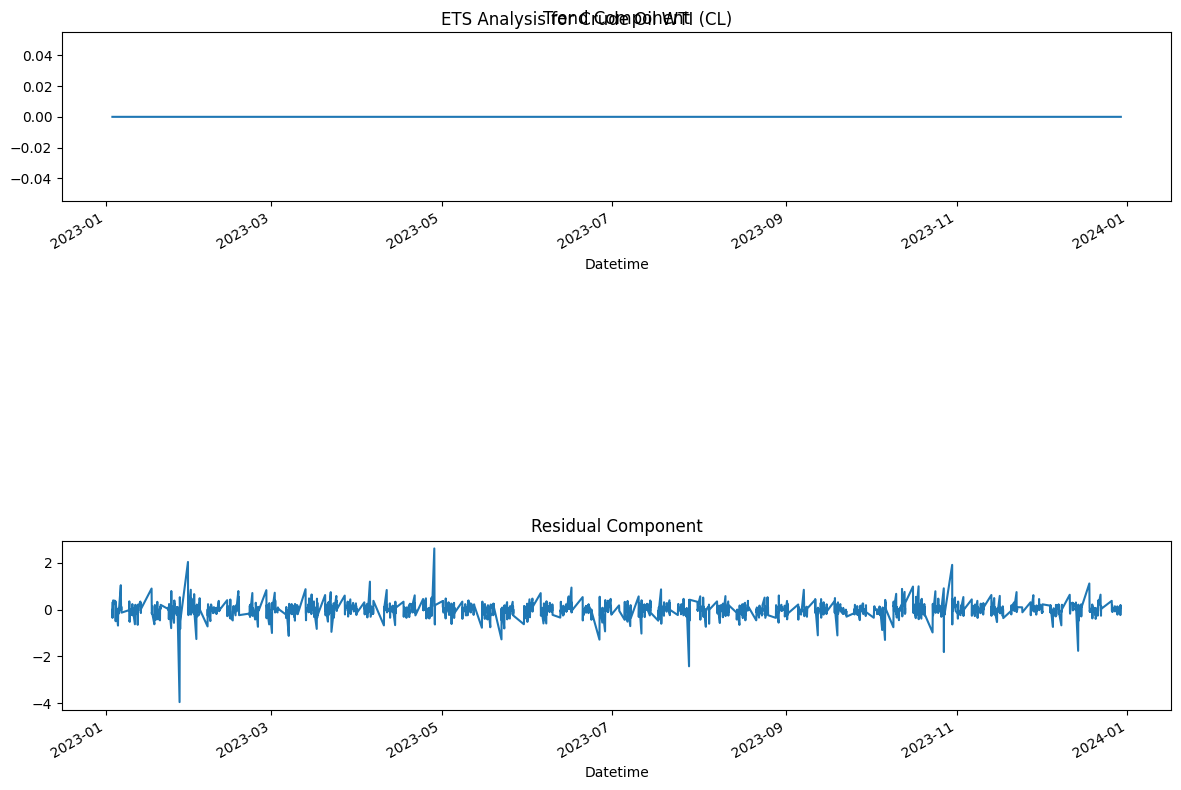

In [14]:
def get_yahoo_data(symbol, start_date='2023-01-01', end_date='2023-12-31', interval='60m'):
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return stock_data

def ets_analysis(time_series, commodity_name):
    ets_model = ExponentialSmoothing(time_series, seasonal='add', seasonal_periods=24)
    ets_result = ets_model.fit()

    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    ets_result.trend.plot(title='Trend Component')

    try:
        seasonal_component = ets_result.seasonal
        plt.subplot(3, 1, 2)
        seasonal_component.plot(title='Seasonal Component')
    except AttributeError as e:
        print(f"No seasonal component available: {e}")

    plt.subplot(3, 1, 3)
    ets_result.resid.plot(title='Residual Component')

    plt.tight_layout()
    plt.suptitle(f'ETS Analysis for {commodity_name} ({commodity})')
    plt.show()

    return ets_result

for commodity, meaning in commodities.items():
    try:
        data_commodity = get_yahoo_data(symbol=commodity, interval='60m')
        dataframes[commodity] = data_commodity
        time_series = data_commodity['Close']
        ets_result = ets_analysis(time_series, meaning)

    except ValueError as e:
        print(f"Error obtaining intraday data for {meaning} ({commodity}): {e}")


The Hodrick-Prescott filter

[*********************100%%**********************]  1 of 1 completed


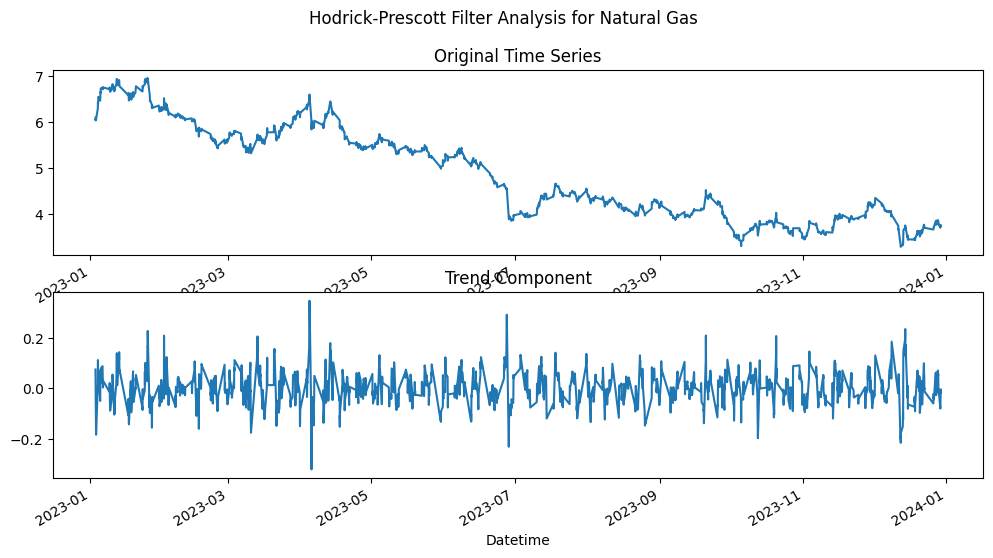

[*********************100%%**********************]  1 of 1 completed


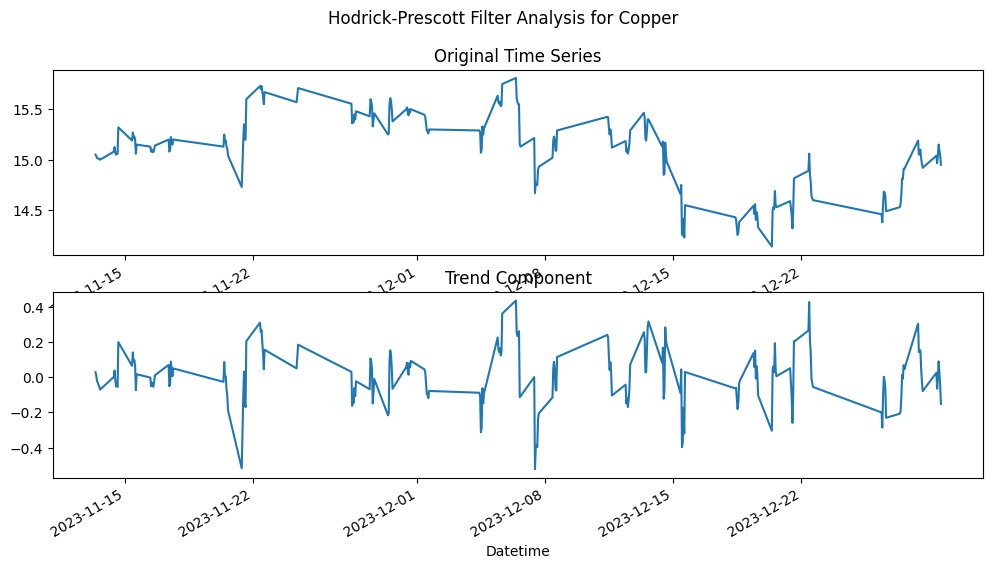

[*********************100%%**********************]  1 of 1 completed


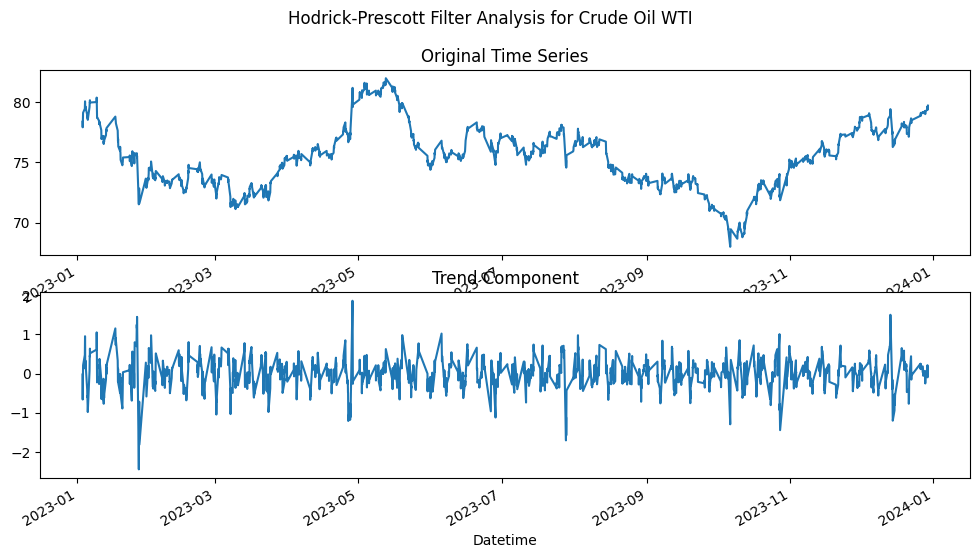

In [15]:
def get_yahoo_data(symbol, start_date='2023-01-01', end_date='2023-12-31', interval='60m'):
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return stock_data

def hp_filter_analysis(time_series, commodity_name):
    trend, cycle = hpfilter(time_series, lamb=1600)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    time_series.plot(title='Original Time Series')

    plt.subplot(2, 1, 2)
    trend.plot(title='Trend Component')
    plt.suptitle(f'Hodrick-Prescott Filter Analysis for {commodity_name}')
    plt.show()

    return trend, cycle

commodities = {'NG': 'Natural Gas', 'HG': 'Copper', 'CL': 'Crude Oil WTI'}
dataframes = {}

for commodity, meaning in commodities.items():
    try:
        data_commodity = get_yahoo_data(symbol=commodity, interval='60m')
        time_series = data_commodity['Close']
        trend_component, cycle_component = hp_filter_analysis(time_series, meaning)

    except ValueError as e:
        print(f"Error obtaining intraday data for {meaning} ({commodity}): {e}")


Dickey-Fuller test

In [16]:
def get_yahoo_data(symbol, start_date='2023-01-01', end_date='2023-12-31', interval='60m'):
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return stock_data

def dickey_fuller_test(time_series, commodity_name):
    result = adfuller(time_series, autolag='AIC')

    print(f"Results of Dickey-Fuller Test for {commodity_name}:")
    print(f'Test Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

    if result[1] <= 0.05:
        print("Conclusion: La serie temporal es estacionaria (rechazamos la hipótesis nula)")
    else:
        print("Conclusion: La serie temporal no es estacionaria (no rechazamos la hipótesis nula)")

for commodity, meaning in commodities.items():
    try:
        data_commodity = get_yahoo_data(symbol=commodity, interval='60m')
        time_series = data_commodity['Close']
        dickey_fuller_test(time_series, meaning)

    except ValueError as e:
        print(f"Error obtaining intraday data for {meaning} ({commodity}): {e}")

[*********************100%%**********************]  1 of 1 completed
Results of Dickey-Fuller Test for Natural Gas:
Test Statistic: -1.1737809503679666
p-value: 0.6847715926709466
Critical Values: {'1%': -3.4341116127463858, '5%': -2.863201542300677, '10%': -2.567654556829725}
Conclusion: La serie temporal no es estacionaria (no rechazamos la hipótesis nula)
[*********************100%%**********************]  1 of 1 completed
Results of Dickey-Fuller Test for Copper:
Test Statistic: -2.6074625884764084
p-value: 0.09146469035505544
Critical Values: {'1%': -3.4596204846395824, '5%': -2.8744153028455948, '10%': -2.5736320761218576}
Conclusion: La serie temporal no es estacionaria (no rechazamos la hipótesis nula)
[*********************100%%**********************]  1 of 1 completed
Results of Dickey-Fuller Test for Crude Oil WTI:
Test Statistic: -2.1979381621604848
p-value: 0.20699463597926415
Critical Values: {'1%': -3.4341137777946718, '5%': -2.8632024980220288, '10%': -2.56765506572863}

Autocorrelation and partial autocorrelation of a time series

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


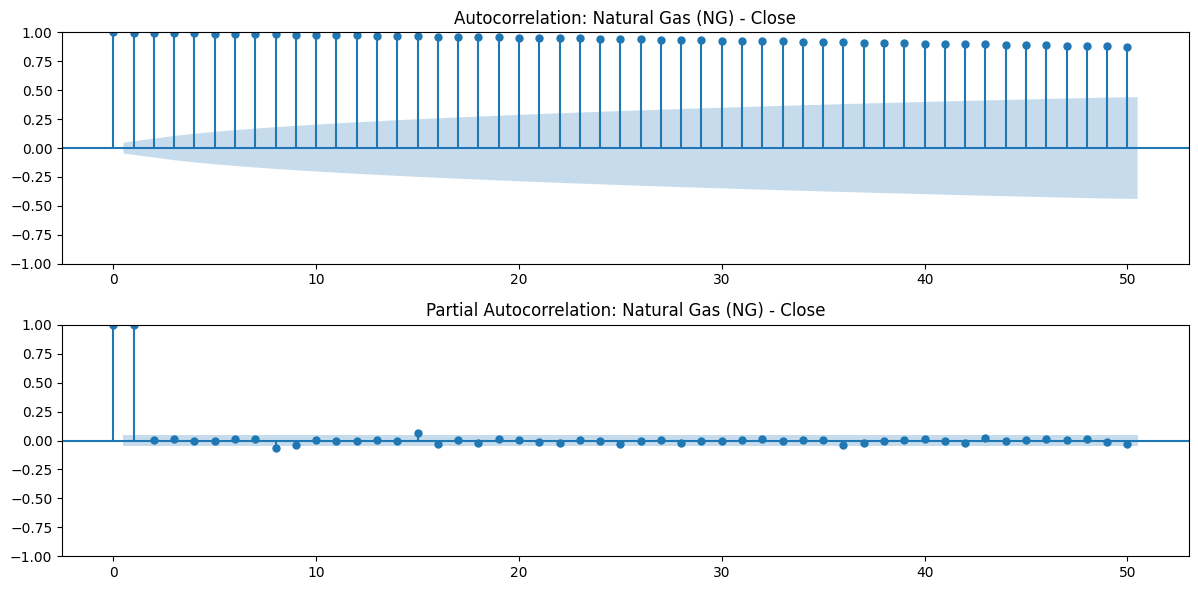

In [17]:
for commodity, meaning in commodities.items():
    try:
        data_commodity = yf.download(commodity, start='2023-01-01', end='2023-12-31', interval='60m')
        dataframes[commodity] = data_commodity

    except ValueError as e:
        print(f"Error obtaining intraday data for {meaning} ({commodity}): {e}")

def plot_acf_pacf(time_series, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(time_series, lags=50, ax=plt.gca())
    plt.title(f'Autocorrelation: {title}')

    plt.subplot(2, 1, 2)
    plot_pacf(time_series, lags=50, ax=plt.gca())
    plt.title(f'Partial Autocorrelation: {title}')

    plt.tight_layout()
    plt.show()


for commodity, data_commodity in dataframes.items():
    try:
        time_series = data_commodity['Close']
        plot_acf_pacf(time_series, f'{commodities[commodity]} ({commodity}) - Close')
    except ValueError as e:
        print(f"Error processing data for {commodities[commodity]} ({commodity}): {e}")

CatBoost model

0:	learn: 29.0576724	total: 48.9ms	remaining: 4.84s
99:	learn: 24.6898645	total: 116ms	remaining: 0us
0:	learn: 29.6321288	total: 1.36ms	remaining: 135ms
99:	learn: 25.2593395	total: 62.4ms	remaining: 0us
0:	learn: 28.8646575	total: 292us	remaining: 29ms
99:	learn: 24.0226415	total: 72.8ms	remaining: 0us


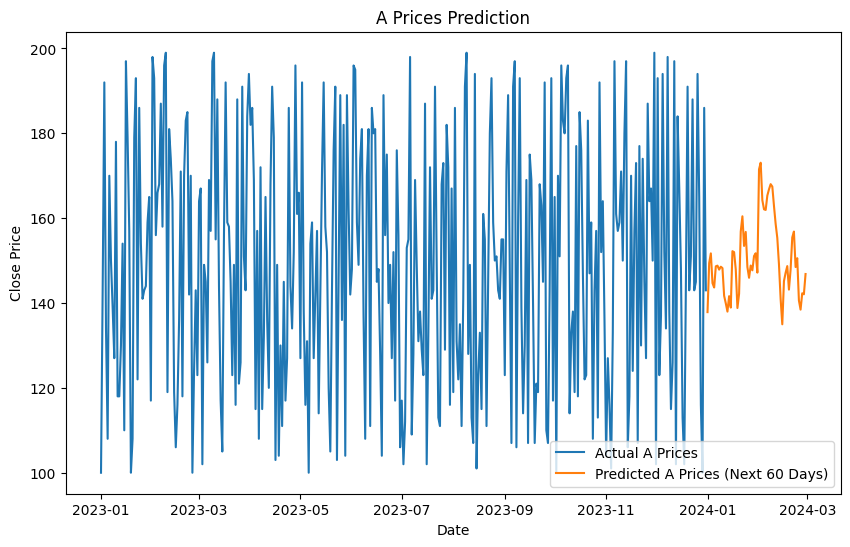

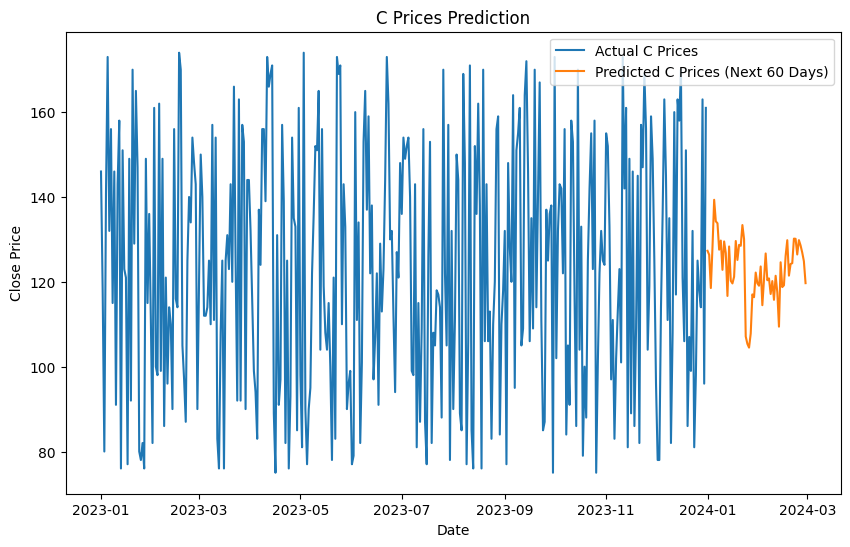

In [18]:
commodities_data = {
    'A': pd.DataFrame({
        'Date': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'),
        'Close': np.random.randint(100, 200, size=365)
    }),
    'B': pd.DataFrame({
        'Date': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'),
        'Close': np.random.randint(50, 150, size=365)
    }),
    'C': pd.DataFrame({
        'Date': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'),
        'Close': np.random.randint(75, 175, size=365)
    })
}

prediction_period = 60
models = {}
predictions = {}

for commodity, data in commodities_data.items():
    data['Day'] = data['Date'].dt.day
    data['Month'] = data['Date'].dt.month
    data['Year'] = data['Date'].dt.year

    features = ['Day', 'Month', 'Year']
    target = 'Close'

    model = CatBoostRegressor(iterations=100, depth=10, learning_rate=0.05, loss_function='RMSE', random_seed=42)
    model.fit(data[features], data[target], verbose=100)

    future_dates = pd.date_range(data['Date'].max() + pd.Timedelta(days=1), periods=prediction_period, freq='D')
    future_data = pd.DataFrame({'Date': future_dates})
    future_data['Day'] = future_data['Date'].dt.day
    future_data['Month'] = future_data['Date'].dt.month
    future_data['Year'] = future_data['Date'].dt.year

    future_predictions = model.predict(future_data[features])

    models[commodity] = model
    predictions[commodity] = future_predictions

for commodity, data in commodities_data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label=f'Actual {commodity} Prices')

    future_dates = pd.date_range(data['Date'].max() + pd.Timedelta(days=1), periods=prediction_period, freq='D')
    plt.plot(future_dates, predictions[commodity], label=f'Predicted {commodity} Prices (Next {prediction_period} Days)')

    plt.title(f'{commodity} Prices Prediction')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Prophet model for predicting cryptocurrency prices

 List of cryptocurrencies to analyze

In [19]:
def get_crypto_data(symbol, start_date='2023-01-01', end_date='2023-12-31', interval='60m'):
    crypto_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return crypto_data

cryptocurrencies = {'LTC': 'Litecoin', 'BCH': 'Bitcoin Cash'}
dataframes = {}

for cryptocurrency, meaning in cryptocurrencies.items():
    try:
        data_crypto = get_crypto_data(symbol=cryptocurrency, interval='60m')
        dataframes[cryptocurrency] = data_crypto
    except ValueError as e:
        print(f"Error obtaining intraday data for {meaning} ({cryptocurrency}): {e}")

for cryptocurrency, df in dataframes.items():
    print(f"\nIntraday data for {cryptocurrencies[cryptocurrency]} ({cryptocurrency}):\n")
    display(df.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Intraday data for Litecoin (LTC):



Open       High        Low      Close  Adj Close  \
Datetime                                                                     
2023-01-03 09:30:00  35.799999  36.279999  35.529999  35.610001  35.610001   
2023-01-03 10:30:00  35.605000  35.840000  35.445000  35.470001  35.470001   
2023-01-03 11:30:00  35.480000  35.552101  35.369999  35.439999  35.439999   
2023-01-03 12:30:00  35.439999  35.544998  35.320000  35.450001  35.450001   
2023-01-03 13:30:00  35.490002  35.529999  35.349998  35.349998  35.349998   

                     Volume  
Datetime                     
2023-01-03 09:30:00   40744  
2023-01-03 10:30:00   27140  
2023-01-03 11:30:00   27980  
2023-01-03 12:30:00   45012  
2023-01-03 13:30:00   30018


Intraday data for Bitcoin Cash (BCH):



Open       High        Low      Close  Adj Close  \
Datetime                                                                     
2023-01-03 09:30:00  20.570000  20.690001  20.350000  20.389999  20.389999   
2023-01-03 10:30:00  20.389999  20.410000  20.270000  20.270000  20.270000   
2023-01-03 11:30:00  20.245001  20.280001  20.070000  20.100000  20.100000   
2023-01-03 12:30:00  20.080000  20.100000  19.940001  20.000000  20.000000   
2023-01-03 13:30:00  20.000000  20.000000  19.879999  19.940001  19.940001   

                     Volume  
Datetime                     
2023-01-03 09:30:00   57200  
2023-01-03 10:30:00   25160  
2023-01-03 11:30:00   19386  
2023-01-03 12:30:00   17683  
2023-01-03 13:30:00   29576

Time series plot

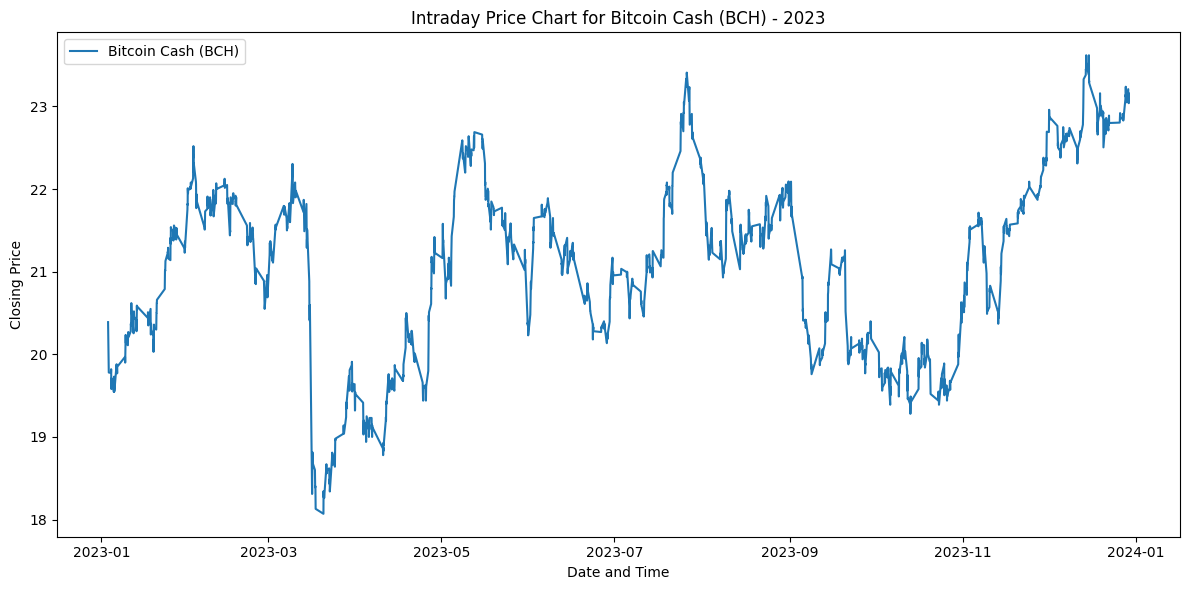

In [20]:
for cryptocurrency, df in dataframes.items():
    df_2023 = df[(df.index.year == 2023)]

    plt.figure(figsize=(12, 6))
    plt.plot(df_2023.index, df_2023['Close'], label=f"{cryptocurrencies[cryptocurrency]} ({cryptocurrency})")

    plt.title(f"Intraday Price Chart for {cryptocurrencies[cryptocurrency]} ({cryptocurrency}) - 2023")
    plt.xlabel("Date and Time")
    plt.ylabel("Closing Price")

    plt.legend()
    plt.tight_layout()
    plt.show()



ETS analysis of a time series

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


No seasonal component available: 'HoltWintersResults' object has no attribute 'seasonal'


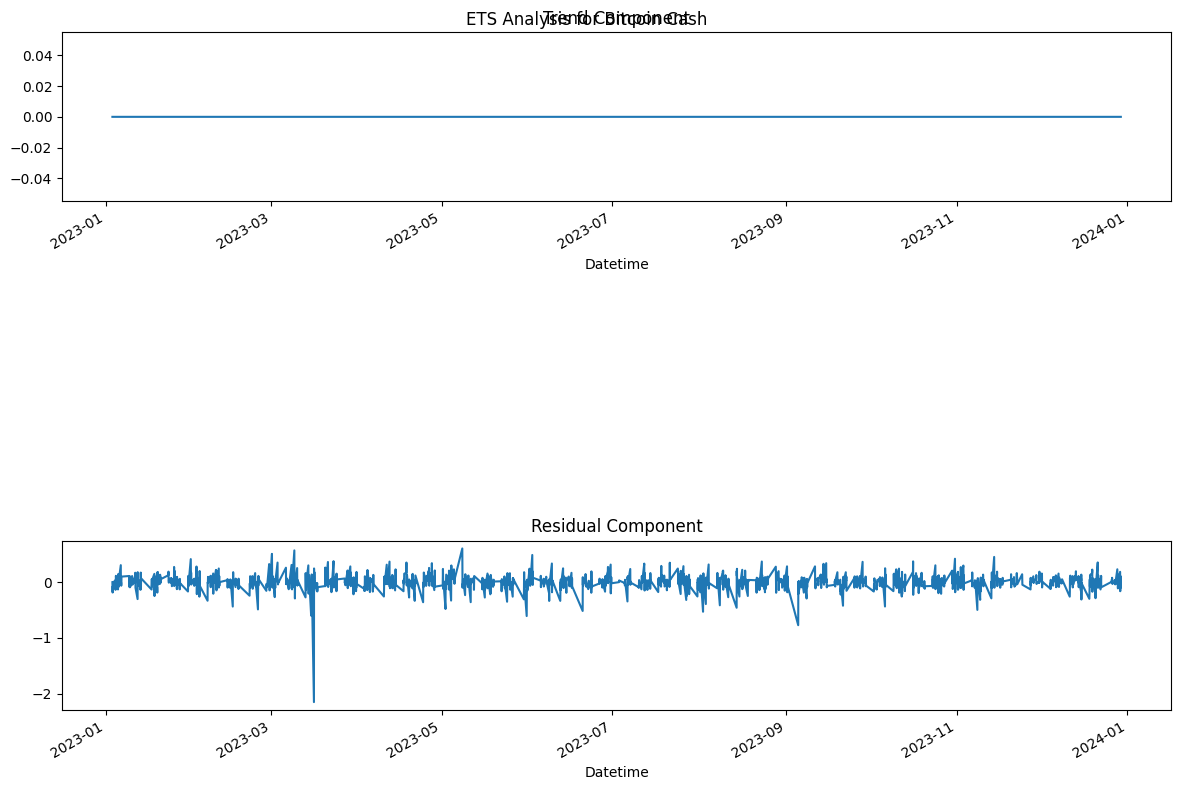

In [21]:
def get_yahoo_data(symbol, start_date='2023-01-01', end_date='2023-12-31', interval='60m'):
    try:
        stock_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
        return stock_data
    except Exception as e:
        print(f"Error obtaining intraday data for {symbol}: {e}")
        return None

def ets_analysis(time_series, cryptocurrency_name):
    ets_model = ExponentialSmoothing(time_series, seasonal='add', seasonal_periods=24)
    ets_result = ets_model.fit()

    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    ets_result.trend.plot(title='Trend Component')
    try:
        seasonal_component = ets_result.seasonal
        plt.subplot(3, 1, 2)
        seasonal_component.plot(title='Seasonal Component')
    except AttributeError as e:
        print(f"No seasonal component available: {e}")

    plt.subplot(3, 1, 3)
    ets_result.resid.plot(title='Residual Component')

    plt.tight_layout()
    plt.suptitle(f'ETS Analysis for {cryptocurrency_name}')
    plt.show()

    return ets_result

for cryptocurrency, meaning in cryptocurrencies.items():
    data_crypto = get_yahoo_data(symbol=cryptocurrency, interval='60m')

    if data_crypto is not None and not data_crypto.empty:
        time_series = data_crypto['Close']
        ets_result = ets_analysis(time_series, meaning)
    else:
        print(f"Error: No valid data found for {meaning} ({cryptocurrency})")


The Hodrick-Prescott filter

[*********************100%%**********************]  1 of 1 completed


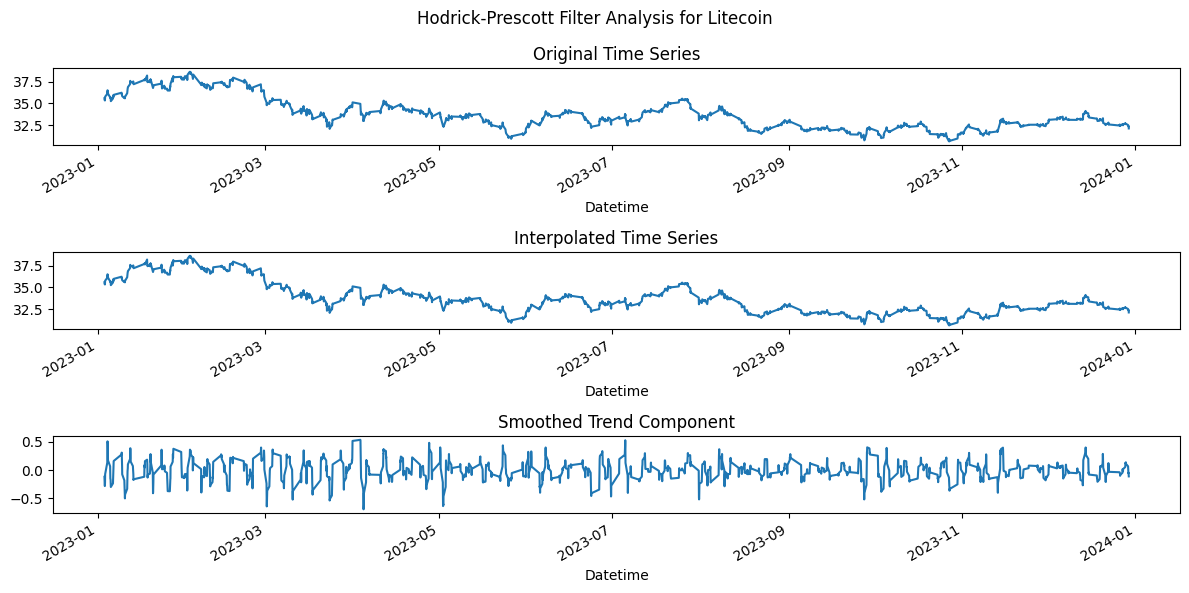

[*********************100%%**********************]  1 of 1 completed


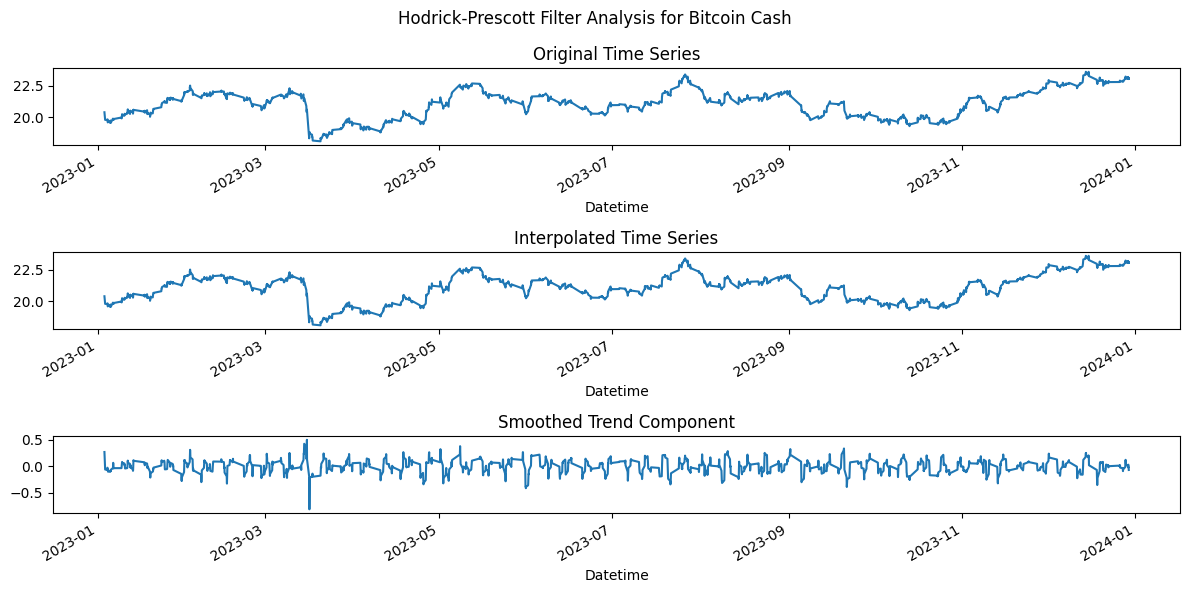

In [22]:
def hp_filter_analysis_smoothed_interpolated(time_series, cryptocurrency_name):
    time_series_interpolated = time_series.interpolate(method='linear')

    trend, cycle = hpfilter(time_series_interpolated, lamb=1600)
    trend_smoothed = trend.rolling(window=4, min_periods=1, center=True).mean()

    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    time_series.plot(title='Original Time Series')

    plt.subplot(3, 1, 2)
    time_series_interpolated.plot(title='Interpolated Time Series')

    plt.subplot(3, 1, 3)
    trend_smoothed.plot(title='Smoothed Trend Component')

    plt.suptitle(f'Hodrick-Prescott Filter Analysis for {cryptocurrency_name}')
    plt.tight_layout()
    plt.show()

    return trend, cycle

for cryptocurrency, meaning in cryptocurrencies.items():
    try:
        data_crypto = yf.download(cryptocurrency, start='2023-01-01', end='2023-12-31', interval='60m')
        time_series = data_crypto['Close']
        trend_component, cycle_component = hp_filter_analysis_smoothed_interpolated(time_series, meaning)

    except ValueError as e:
        print(f"Error obtaining intraday data for {meaning} ({cryptocurrency}): {e}")


Dickey-Fuller test

In [23]:
def dickey_fuller_test(time_series, cryptocurrency_name):
    result = adfuller(time_series, autolag='AIC')

    print(f"Results of Dickey-Fuller Test for {cryptocurrency_name}:")
    print(f'Test Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

    if result[1] <= 0.05:
        print("Conclusion: La serie temporal es estacionaria (rechazamos la hipótesis nula)")
    else:
        print("Conclusion: La serie temporal no es estacionaria (no rechazamos la hipótesis nula)")

cryptocurrencies = {'LTC': 'Litecoin', 'BCH': 'Bitcoin Cash'}
dataframes = {}

for cryptocurrency, meaning in cryptocurrencies.items():
    try:
        data_crypto = yf.download(cryptocurrency, start='2023-01-01', end='2023-12-31', interval='60m')
        time_series = data_crypto['Close']
        dickey_fuller_test(time_series, meaning)

    except ValueError as e:
        print(f"Error obtaining intraday data for {meaning} ({cryptocurrency}): {e}")


[*********************100%%**********************]  1 of 1 completed
Results of Dickey-Fuller Test for Litecoin:
Test Statistic: -2.048182994416214
p-value: 0.26585401002828457
Critical Values: {'1%': -3.4341116127463858, '5%': -2.863201542300677, '10%': -2.567654556829725}
Conclusion: La serie temporal no es estacionaria (no rechazamos la hipótesis nula)
[*********************100%%**********************]  1 of 1 completed
Results of Dickey-Fuller Test for Bitcoin Cash:
Test Statistic: -2.8219824103644244
p-value: 0.05520169636197213
Critical Values: {'1%': -3.434126820603039, '5%': -2.8632082555189444, '10%': -2.5676581314612825}
Conclusion: La serie temporal no es estacionaria (no rechazamos la hipótesis nula)


Autocorrelation and partial autocorrelation of a time series

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


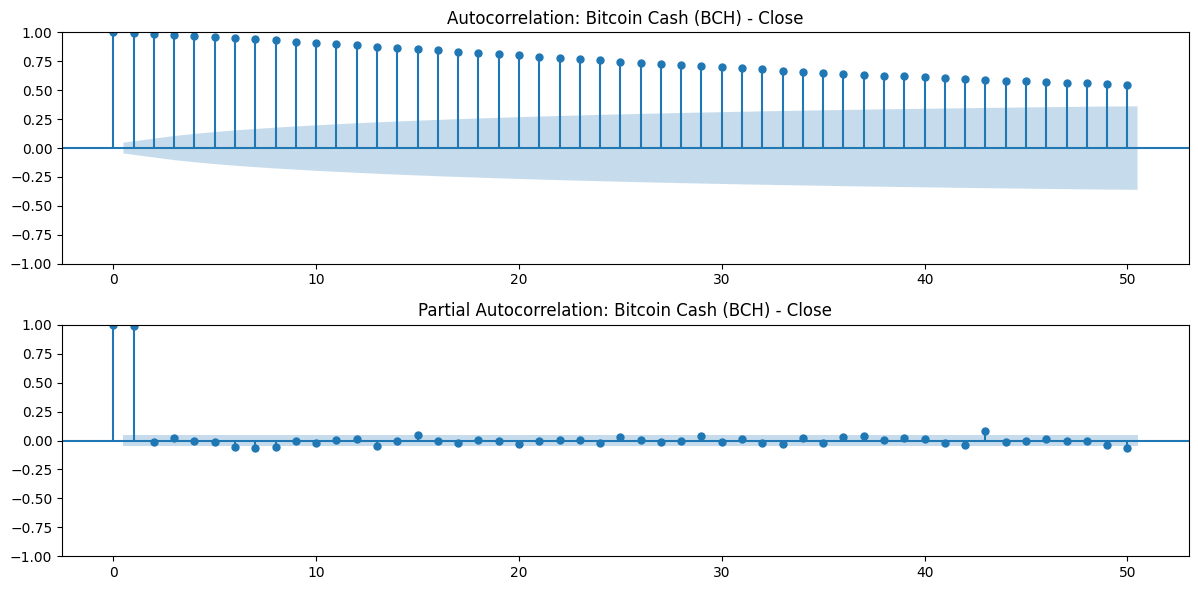

In [24]:
for cryptocurrency, meaning in cryptocurrencies.items():
    try:
        data_crypto = yf.download(cryptocurrency, start='2023-01-01', end='2023-12-31', interval='60m')
        dataframes[cryptocurrency] = data_crypto

    except ValueError as e:
        print(f"Error obtaining intraday data for {meaning} ({cryptocurrency}): {e}")

def plot_acf_pacf(time_series, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(time_series, lags=50, ax=plt.gca())
    plt.title(f'Autocorrelation: {title}')

    plt.subplot(2, 1, 2)
    plot_pacf(time_series, lags=50, ax=plt.gca())
    plt.title(f'Partial Autocorrelation: {title}')

    plt.tight_layout()
    plt.show()

for cryptocurrency, data_crypto in dataframes.items():
    try:
        time_series = data_crypto['Close']
        plot_acf_pacf(time_series, f'{cryptocurrencies[cryptocurrency]} ({cryptocurrency}) - Close')

    except ValueError as e:
        print(f"Error processing data for {cryptocurrencies[cryptocurrency]} ({cryptocurrency}): {e}")


Prophet model

[*********************100%%**********************]  1 of 1 completed

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ftz0zez/hhpp84zi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ftz0zez/yqu053n1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75577', 'data', 'file=/tmp/tmp4ftz0zez/hhpp84zi.json', 'init=/tmp/tmp4ftz0zez/yqu053n1.json', 'output', 'file=/tmp/tmp4ftz0zez/prophet_modelwbjfmbk4/prophet_model-20240108160209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:02:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


16:02:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


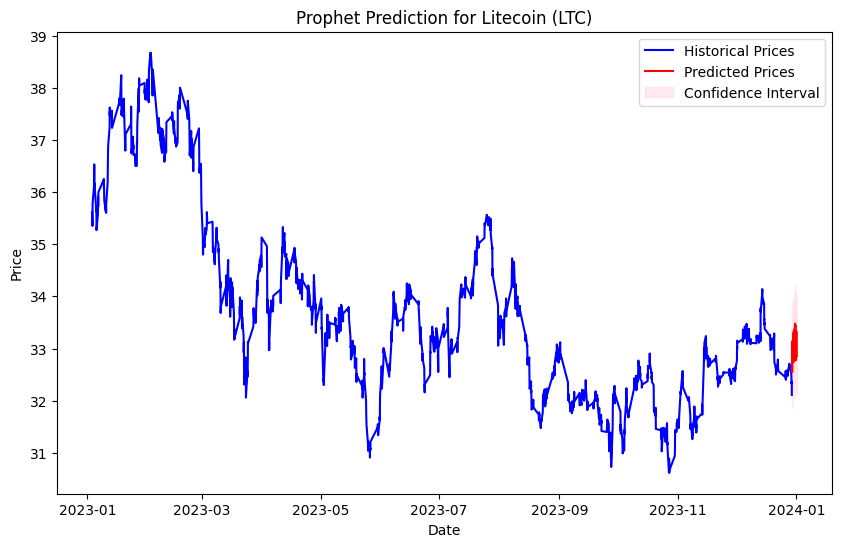

In [120]:
def get_crypto_data(symbol, start_date='2023-01-01', end_date='2023-12-31', interval='60m'):
    crypto_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return crypto_data

crypto_data = get_crypto_data(symbol='LTC', start_date='2023-01-01', end_date='2023-12-31', interval='60m')
crypto_data.reset_index(inplace=True)

crypto_data = crypto_data[['Datetime', 'Close']]
crypto_data.columns = ['ds', 'y']

model = Prophet()
model.fit(crypto_data)

future_dates = model.make_future_dataframe(periods=60, freq='H')

forecast = model.predict(future_dates)

future_predictions = forecast[forecast['ds'] > crypto_data['ds'].max()]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(crypto_data['ds'], crypto_data['y'], label='Historical Prices', color='blue')

ax.plot(future_predictions['ds'], future_predictions['yhat'], label='Predicted Prices', color='red')

ax.fill_between(future_predictions['ds'], future_predictions['yhat_lower'], future_predictions['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')

ax.set_title('Prophet Prediction for Litecoin (LTC)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

plt.show()
